<a href="https://colab.research.google.com/github/vanesalinas/HENRY_PIDA_Telecomunicaciones/blob/main/EDA_Telecomunicaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Estructura del dataframe**

---

> Se cargan los dataframes generados en el proceso de ETL para realizar un vistazo rapido de los datos que contienen y su estructura.

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Datasets PI_DA/df.csv')
df_totales = pd.read_csv('/content/drive/MyDrive/Datasets PI_DA/df_totales.csv')
df_localidades = pd.read_csv('/content/drive/MyDrive/Datasets PI_DA/df_localidades.csv')

In [45]:
# Ajusta la configuración para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.2f}'.format)

In [46]:
df.head()

Año  Trimestre     Provincia  0-10 Mbps  +10-25 Mbps  +25-50 Mbps  \
0 2024.00       1.00  BUENOS AIRES  502922.00    284608.00   1296268.00   
1 2024.00       1.00          CABA   87102.00     37803.00    125198.00   
2 2024.00       1.00     CATAMARCA    6543.00      5165.00     36072.00   
3 2024.00       1.00         CHACO   23852.00      8968.00     35430.00   
4 2024.00       1.00        CHUBUT   76907.00     36631.00     39046.00   

   +50-100 Mbps  +100-250 Mbps  +250-500 Mbps  +500-1000 Mbps  ...  \
0     959048.00      495509.00     1210949.00       170106.00  ...   
1     394021.00      151870.00      639913.00        68804.00  ...   
2      17716.00          42.00        8471.00          854.00  ...   
3      55941.00        1925.00       24782.00          829.00  ...   
4       1257.00           1.00         161.00           33.00  ...   

   Otras_Velocidades  Mbps (Media de bajada)  Accesos por cada 100 hab  \
0          125147.00                  159.13                     27.80   
1               0.00                  229.94                     48.78   
2              70.00                   91.45                     17.50   
3            3816.00                  107.51                     12.48   
4           16640.00                   20.50                     26.02   

   Accesos por cada 100 hogares      ADSL  Cablemodem  Fibra óptica  Wireless  \
0                         81.10 203297.00  2790663.00    1799013.00 150290.00   
1                        119.53  70108.00  1177475.00     203756.00   4493.00   
2                         68.82   5901.00    11025.00      56542.00   1384.00   
3                         46.70  11343.00    58929.00      64463.00   8404.00   
4                         84.89  26306.00    77217.00      26356.00  30867.00   

   Otras_Tecnologias  Total_Tecnologias  
0          101294.00         5044557.00  
1           48879.00         1504711.00  
2              81.00           74933.00  
3           12404.00          155543.00  
4            9930.00          170676.00  

[5 rows x 22 columns]

In [47]:
df.shape

(624, 22)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           624 non-null    float64
 1   Trimestre                     624 non-null    float64
 2   Provincia                     624 non-null    object 
 3   0-10 Mbps                     624 non-null    float64
 4   +10-25 Mbps                   624 non-null    float64
 5   +25-50 Mbps                   624 non-null    float64
 6   +50-100 Mbps                  624 non-null    float64
 7   +100-250 Mbps                 624 non-null    float64
 8   +250-500 Mbps                 624 non-null    float64
 9   +500-1000 Mbps                624 non-null    float64
 10  +1000-5000 Mbps               624 non-null    float64
 11  +5000 Mbps                    624 non-null    float64
 12  Otras_Velocidades             624 non-null    float64
 13  Mbps 

In [49]:
df.describe()

Año  Trimestre  0-10 Mbps  +10-25 Mbps  +25-50 Mbps  +50-100 Mbps  \
count  624.00     624.00     624.00       624.00       624.00        624.00   
mean  2020.50       2.50  143093.08     62410.96     91928.60      60350.11   
std      1.91       1.15  272541.02    139114.29    245411.62     192664.27   
min   2017.00       1.00    3327.00         0.00         0.00          0.00   
25%   2019.00       1.00   37731.25      8446.50      1642.50        356.25   
50%   2020.50       2.50   66288.50     24299.00     20059.50       5478.00   
75%   2022.00       4.00  104901.25     38292.25     41736.25      28161.75   
max   2024.00       4.00 1939102.00   1088846.00   1776123.00    1501057.00   

       +100-250 Mbps  +250-500 Mbps  +500-1000 Mbps  +1000-5000 Mbps  ...  \
count         624.00         624.00          624.00           624.00  ...   
mean         7938.72       30709.25         2545.60             9.15  ...   
std         49409.85      135945.16        15426.76            98.26  ...   
min             0.00           0.00            0.00             0.00  ...   
25%             0.00           0.00            0.00             0.00  ...   
50%             1.00         343.50            0.00             0.00  ...   
75%           142.25        5561.50           77.75             0.00  ...   
max        511235.00     1237732.00       170106.00          1104.00  ...   

       Otras_Velocidades  Mbps (Media de bajada)  Accesos por cada 100 hab  \
count             624.00                  624.00                    624.00   
mean             9905.14                   34.02                     17.69   
std             17973.45                   35.43                      8.79   
min                 0.00                    3.98                      3.03   
25%               589.50                   10.63                     11.42   
50%              4467.50                   20.88                     14.86   
75%             13300.75                   42.38                     22.47   
max            125147.00                  234.44                     51.62   

       Accesos por cada 100 hogares       ADSL  Cablemodem  Fibra óptica  \
count                        624.00     624.00      624.00        624.00   
mean                          59.59   91445.41   219088.94      70617.29   
std                           21.67  178710.24   514647.52     217274.08   
min                           10.59    2827.00      263.00          0.00   
25%                           43.02   17829.25    23681.00       1236.00   
50%                           56.23   37650.50    54599.00      13174.00   
75%                           75.03   74430.25    83161.25      40999.75   
max                          122.90 1452061.00  2797700.00    1799013.00   

       Wireless  Otras_Tecnologias  Total_Tecnologias  
count    624.00             624.00             624.00  
mean   17525.62            8735.69          407412.94  
std    24649.98           13217.68          858886.18  
min        0.00              29.00           14904.00  
25%     3109.00             848.75           85931.50  
50%     8178.00            2953.00          126947.00  
75%    20057.25           11170.50          217597.75  
max   150290.00          101294.00         5044557.00  

[8 rows x 21 columns]

In [50]:
df_totales.head()

Año  Trimestre        Periodo  Accesos por cada 100 hogares  \
0  2024          1   Ene-Mar 2024                         78.89   
1  2023          4   Oct-Dic 2023                         78.56   
2  2023          3  Jul-Sept 2023                         77.84   
3  2023          1   Ene-Mar 2023                         77.20   
4  2022          4   Oct-Dic 2022                         77.21   

   Accesos por cada 100 hab     ADSL  Cablemodem  Fibra óptica  Wireless  \
0                     24.79   774475     5986957       4015101    598682   
1                     24.66   836390     6022532       3908183    585760   
2                     24.41   897895     6018832       3708718    581436   
3                     24.17  1204417     6002582       3243411    576647   
4                     24.15  1315373     6037457       3060575    572969   

    Otros  ...  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  257941  ...           28801                    69355   
1  194796  ...           29708                    71742   
2  200027  ...           30274                    80609   
3  214838  ...           31437                    82048   
4  221740  ...           31981                    85668   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 866152                  950930                   672155   
1                 900253                  978108                   697232   
2                 945608                  998725                   720084   
3                1001553                 1060321                   729194   
4                1075272                 1109421                   765015   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps  Otras Velocidades  \
0                   353896         8363694             328173   
1                   350290         8224736             295592   
2                   350918         8003269             277421   
3                   357769         7564819             414754   
4                   335573         7410902             394282   

   Total conexiones segun velocidad  Ingresos (miles de pesos)  
0                          11633156               280419124.08  
1                          11547661               167376014.80  
2                          11406908               133106593.41  
3                          11241895               104134992.81  
4                          11208114                72443482.99  

[5 rows x 22 columns]

In [51]:
df_totales.shape

(40, 22)

In [52]:
df_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Año                               40 non-null     int64  
 1   Trimestre                         40 non-null     int64  
 2   Periodo                           40 non-null     object 
 3   Accesos por cada 100 hogares      40 non-null     float64
 4   Accesos por cada 100 hab          40 non-null     float64
 5   ADSL                              40 non-null     int64  
 6   Cablemodem                        40 non-null     int64  
 7   Fibra óptica                      40 non-null     int64  
 8   Wireless                          40 non-null     int64  
 9   Otros                             40 non-null     int64  
 10  Total                             40 non-null     int64  
 11  Mbps (Media de bajada)            40 non-null     float64
 12  Hasta 512 

In [53]:
df_totales.describe()

Año  Trimestre  Accesos por cada 100 hogares  \
count   40.00      40.00                         40.00   
mean  2018.53       2.48                         62.48   
std      2.95       1.15                          9.64   
min   2014.00       1.00                         49.55   
25%   2016.00       1.00                         53.64   
50%   2018.50       2.50                         61.95   
75%   2021.00       3.25                         69.57   
max   2024.00       4.00                         78.89   

       Accesos por cada 100 hab       ADSL  Cablemodem  Fibra óptica  \
count                     40.00      40.00       40.00         40.00   
mean                      19.34 2786086.05  4358984.97    1095079.60   
std                        3.16 1038625.71  1307684.01    1211064.34   
min                       15.05  774475.00  2407330.00     139187.00   
25%                       16.47 2001598.00  3102459.25     169470.50   
50%                       19.14 3230908.00  4374635.00     512556.00   
75%                       21.66 3716771.50  5687862.50    1495696.50   
max                       24.79 3803024.00  6073426.00    4015101.00   

       Wireless     Otros       Total  ...  Hasta 512 kbps  \
count     40.00     40.00       40.00  ...           40.00   
mean  290132.38 156235.75  8686518.75  ...        47619.97   
std   197706.75  83954.15  1672164.86  ...        50000.52   
min    70749.00  54300.00  6398398.00  ...         5675.00   
25%    85307.25  69048.00  7187732.25  ...        29481.25   
50%   270359.00 172437.00  8560895.00  ...        36230.00   
75%   480829.75 247467.25  9918698.25  ...        41087.50   
max   598682.00 265328.00 11633156.00  ...       241713.00   

       Entre 512 Kbps y 1 Mbps  Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  \
count                    40.00                  40.00                   40.00   
mean                 222735.33             3290090.27               912765.35   
std                  194203.51             1501302.82               234472.42   
min                   28521.00              866152.00               289182.00   
25%                   71145.25             2545489.50               843809.25   
50%                  198451.00             3327425.00               978762.00   
75%                  316865.00             4848150.25              1060943.25   
max                  687619.00             5153437.00              1245333.00   

       Entre 10 Mbps y 20 Mbps  Entre 20 Mbps y 30 Mbps  Más de 30 Mbps  \
count                    40.00                    40.00           40.00   
mean                 893729.68                484459.33      2651956.30   
std                  460936.56                443504.40      2986762.90   
min                  101127.00                   345.00        11595.00   
25%                  687996.50                111917.25        30521.50   
50%                  802908.00                418795.50       869153.50   
75%                 1061018.50                604926.50      4733011.75   
max                 2068087.00               1688748.00      8363694.00   

       Otras Velocidades  Total conexiones segun velocidad  \
count              40.00                             40.00   
mean           146352.05                        8649708.28   
std            130775.49                        1712236.84   
min                 0.00                        6272846.00   
25%                 0.00                        7144003.25   
50%            165319.00                        8560895.00   
75%            237051.75                        9918698.25   
max            414754.00                       11633156.00   

       Ingresos (miles de pesos)  
count                      40.00  
mean                 36870497.10  
std                  53397406.70  
min                   2984054.21  
25%                   6817891.30  
50%                  18422550.18  
75%                  39429736.05  
max                 280419124.08  

In [54]:
df_localidades.head()

Provincia     Partido          Localidad Link Indec  0-10 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100     914.00   
1  BUENOS AIRES  25 de Mayo          Del Valle    6854020     192.00   
2  BUENOS AIRES  25 de Mayo          Ernestina    6854030      75.00   
3  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040     180.00   
4  BUENOS AIRES  25 de Mayo   Lucas Monteverde    6854050       5.00   

   +10-25 Mbps  +25-50 Mbps  +50-100 Mbps  +100-250 Mbps  +250-500 Mbps  ...  \
0      2356.00      2175.00        702.00           0.00          98.00  ...   
1         0.00         0.00          0.00           0.00           0.00  ...   
2         0.00         0.00          0.00           0.00           0.00  ...   
3         0.00         0.00          1.00           0.00           0.00  ...   
4         0.00         0.00          0.00           0.00           0.00  ...   

   Otras_Velocidades  ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA  SATELITAL  \
0               0.00   755        4600        0             2        742   
1               0.00   181           0        0             0          1   
2               0.00    75           0        0             0          0   
3               0.00     0           0        0             0          0   
4               0.00     0           0        0             0          0   

   WIMAX  WIRELESS  Otras_Tecnologias  Totales_Tecnologias  
0      0       727                  0                 6826  
1      0         0                 10                  192  
2      0         0                  0                   75  
3      0       181                  0                  181  
4      0         6                  0                    6  

[5 rows x 23 columns]

In [55]:
df_localidades.shape

(2884, 23)

In [56]:
df_localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Provincia            2884 non-null   object 
 1   Partido              2884 non-null   object 
 2   Localidad            2884 non-null   object 
 3   Link Indec           2884 non-null   object 
 4   0-10 Mbps            2884 non-null   float64
 5   +10-25 Mbps          2884 non-null   float64
 6   +25-50 Mbps          2884 non-null   float64
 7   +50-100 Mbps         2884 non-null   float64
 8   +100-250 Mbps        2884 non-null   float64
 9   +250-500 Mbps        2884 non-null   float64
 10  +500-1024 Mbps       2884 non-null   float64
 11  4000 Mbps            2884 non-null   float64
 12  10000 Mbps           2884 non-null   float64
 13  Otras_Velocidades    2884 non-null   float64
 14  ADSL                 2884 non-null   int64  
 15  CABLEMODEM           2884 non-null   i

In [57]:
df_localidades.describe()

0-10 Mbps  +10-25 Mbps  +25-50 Mbps  +50-100 Mbps  +100-250 Mbps  \
count    2884.00      2884.00      2884.00       2884.00        2884.00   
mean      640.97       274.32       907.09        821.63         240.45   
std      3045.48      1614.13      6120.01       8879.02        3018.23   
min         0.00         0.00         0.00          0.00           0.00   
25%         8.00         0.00         0.00          0.00           0.00   
50%        85.00         1.00         0.00          0.00           0.00   
75%       422.25        61.00        15.00          0.00           0.00   
max     87102.00     45687.00    174690.00     394021.00      151870.00   

       +250-500 Mbps  +500-1024 Mbps  4000 Mbps  10000 Mbps  \
count        2884.00         2884.00    2884.00     2884.00   
mean          879.73           89.85       0.00        0.00   
std         12544.77         1323.61       0.02        0.17   
min             0.00            0.00       0.00        0.00   
25%             0.00            0.00       0.00        0.00   
50%             0.00            0.00       0.00        0.00   
75%             0.00            0.00       0.00        0.00   
max        639913.00        68804.00       1.00        9.00   

       Otras_Velocidades     ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA  \
count            2884.00  2884.00     2884.00  2884.00       2884.00   
mean               67.97   266.33     2061.24     4.03       1379.62   
std               647.35  1667.92    23502.06    44.51       9170.77   
min                 0.00     0.00        0.00     0.00          0.00   
25%                 0.00     0.00        0.00     0.00          0.00   
50%                 0.00     0.00        0.00     0.00          1.00   
75%                 2.00    79.25       32.25     0.00        195.25   
max             24594.00 70108.00  1177475.00  2050.00     281390.00   

       SATELITAL   WIMAX  WIRELESS  Otras_Tecnologias  Totales_Tecnologias  
count    2884.00 2884.00   2884.00            2884.00              2884.00  
mean        0.97    0.76    178.90              68.00              3959.85  
std        14.02   15.59    626.35             972.86             32730.62  
min         0.00    0.00      0.00               0.00                 0.00  
25%         0.00    0.00      0.00               0.00                30.00  
50%         0.00    0.00     28.00               0.00               177.00  
75%         1.00    0.00    124.25               0.00              1115.25  
max       742.00  444.00  16630.00           46762.00           1504711.00

Esta seleccion es para responder a las siguientes preguntas que me permitiran entender y comprender el comportamiento del consumo de Internet en Argentina:
- ¿Cómo ha evolucionado la velocidad de conexión promedio en los últimos años?
- ¿Cuál es la penetración de internet en las diferentes regiones de Argentina?
- ¿Cuáles son las provincias con mayor penetración de internet?
- ¿Qué tecnologías son las más utilizadas, en que regiones y cuáles tienen mayor potencial de crecimiento?
- ¿Cómo han evolucionado los ingresos por servicios de internet a lo largo del tiempo?

# **Limpieza de datos**

---

## Registros vacios o nulos.

En la informacion de cada dataframe podemos verificar que no hay registros vacios. Si podemos visualizar que hay registros con valores 0 pero esta informacion es correcta por lo que la vamos a mantener igual.

## Valores duplicados

In [58]:
# Se revisa si existe registros duplicados
listado_df = [df, df_totales, df_localidades]

for data in listado_df:
  print(data.duplicated().sum())

0
0
0


# **Visualizacion y exploracion de los datos**

---

In [59]:
# Filtrar el DataFrame para excluir el año 2024
df_filtradoA = df[df['Año'] != 2024]
df_filtradoB = df_totales[df_totales['Año'] != 2024]

## **HISTOGRAMAS** para comprender la distribucion de las variables numericas.

<Axes: xlabel='Mbps (Media de bajada)', ylabel='Count'>

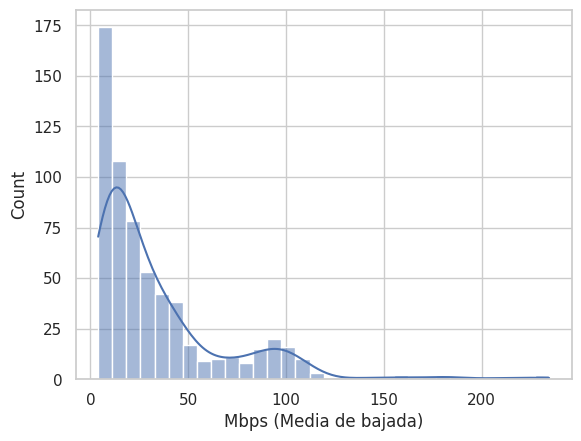

In [88]:
# Histograma con estimación de densidad
sns.histplot(data=df, x='Mbps (Media de bajada)', kde=True)

> La distribución está claramente sesgada hacia la derecha. Esto significa que la mayoría de las velocidades de bajada son relativamente bajas, pero hay un número menor de conexiones con velocidades mucho más altas.

## **Boxplot** para identificar outliers

<Axes: xlabel='Mbps (Media de bajada)'>

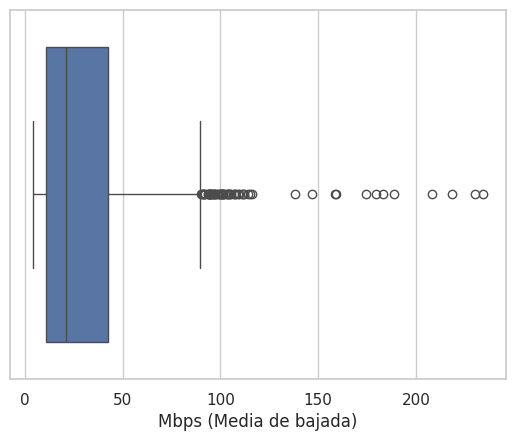

In [83]:
from scipy import stats

# Calcular el z-score para la columna 'Mbps (Media de bajada)'
z_scores = np.abs(stats.zscore(df['Mbps (Media de bajada)']))
outliers = df[z_scores > 3]

# Crear un boxplot
sns.boxplot(x='Mbps (Media de bajada)', data=df)

> La gran mayoría de las observaciones se encuentran en el rango de 0 a 50 Mbps. Esto sugiere que una porción significativa de las conexiones a internet tienen velocidades relativamente bajas. Los puntos individuales por encima de los 100 Mbps representan valores atípicos (outliers) en comparación con el resto de los datos. Estos valores podrían corresponder a conexiones con velocidades excepcionalmente altas, quizás debido a planes premium o ubicaciones con infraestructura de red superior. La distribución de los datos parece estar sesgada hacia la derecha, lo que indica que hay una cola larga de valores altos. Esto es consistente con la presencia de los outliers.

Los resultados sugieren que existe una brecha significativa en las velocidades de internet, con una mayoría de usuarios con conexiones más lentas y una minoría con conexiones muy rápidas. Estos resultados podrían servir como base para diseñar políticas públicas que promuevan la expansión de la conectividad a internet de alta velocidad y reduzcan la brecha digital.

<Axes: xlabel='Accesos por cada 100 hab'>

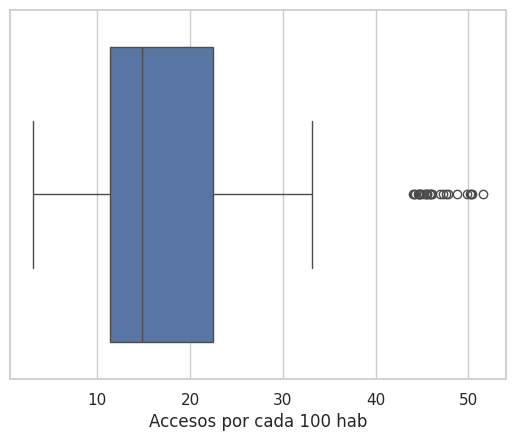

In [84]:
# Calcular el z-score para la columna 'Mbps (Media de bajada)'
z_scores = np.abs(stats.zscore(df['Accesos por cada 100 hab']))
outliers = df[z_scores > 3]

# Crear un boxplot
sns.boxplot(x='Accesos por cada 100 hab', data=df)

> La mayoría de las localidades o regiones presentan entre 10 y 25 accesos por cada 100 habitantes. Los puntos individuales por encima de los 40 accesos por cada 100 habitantes representan valores atípicos (outliers). Estos valores podrían corresponder a zonas urbanas densamente pobladas. La distribución de los datos parece estar ligeramente sesgada hacia la derecha, lo que indica que hay una cola larga de valores altos.

<Axes: xlabel='Accesos por cada 100 hogares'>

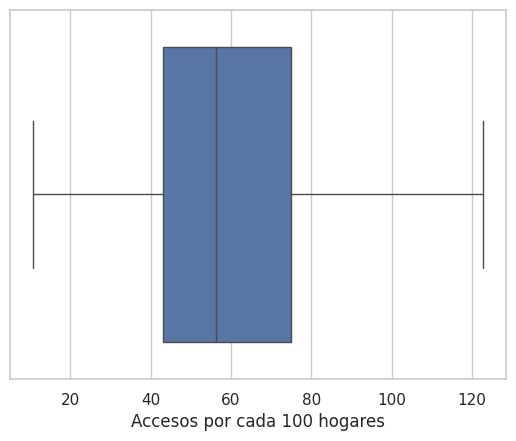

In [85]:
# Calcular el z-score para la columna 'Mbps (Media de bajada)'
z_scores = np.abs(stats.zscore(df['Accesos por cada 100 hogares']))
outliers = df[z_scores > 3]

# Crear un boxplot
sns.boxplot(x='Accesos por cada 100 hogares', data=df)

> La mayoría de las localidades o regiones presentan entre 40 y 80 accesos a internet por cada 100 hogares. En este caso, la mediana se encuentra alrededor de los 60 accesos por cada 100 hogares. A simple vista, no se observan puntos fuera de los bigotes, lo que sugiere que no hay valores extremadamente altos o bajos que se desvíen significativamente del resto de los datos. Esto podría indicar una distribución de datos relativamente homogénea.

<Axes: >

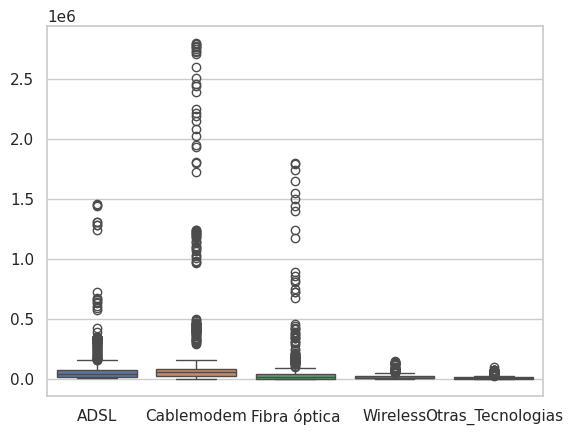

In [86]:
sns.boxplot(data=df[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otras_Tecnologias']])

> El cablemodem presenta, en general, los valores más altos y una mayor dispersión. Las tecnologías ADSL, Wireless y "Otras tecnologías" presentan los valores más bajos, lo que indica velocidades o volúmenes de datos generalmente menores.

## Analisis de **series temporales** para visualizar como han cambiado las variables a lo largo del tiempo.

### Evolucion en el tiempo de las cantidades de accesos segun velocidad para cada provincia

In [61]:
# Columnas de velocidad (las primeras tres columnas son Año, Trimestre y Provincia)
velocidad_cols = df.columns[3:13]
velocidad_cols

Index(['0-10 Mbps', '+10-25 Mbps', '+25-50 Mbps', '+50-100 Mbps',
       '+100-250 Mbps', '+250-500 Mbps', '+500-1000 Mbps', '+1000-5000 Mbps',
       '+5000 Mbps', 'Otras_Velocidades'],
      dtype='object')

In [62]:
# Agrupa por Año y Provincia y calcula la suma de cada rango de velocidad
df_grouped = df.groupby(['Año', 'Provincia'])[velocidad_cols].sum().reset_index()

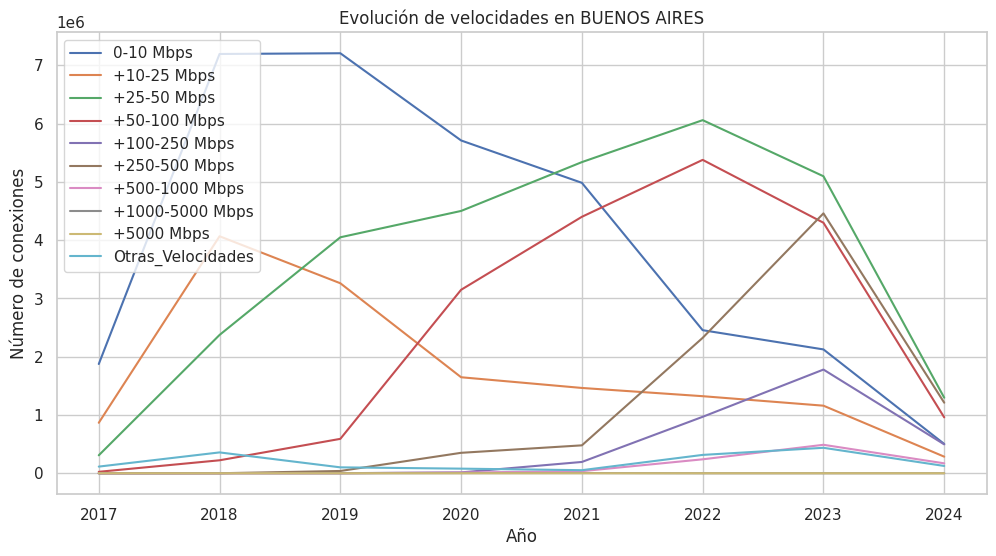

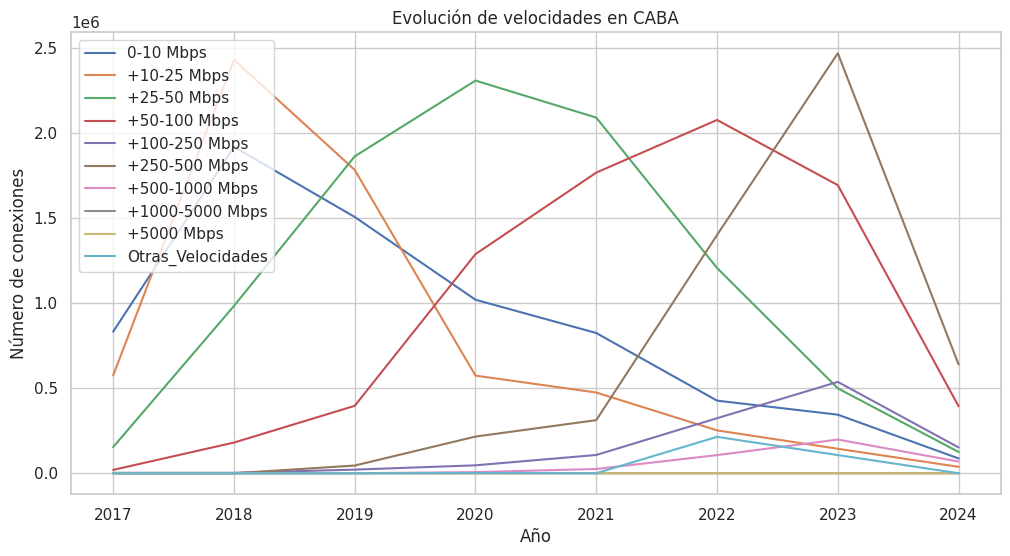

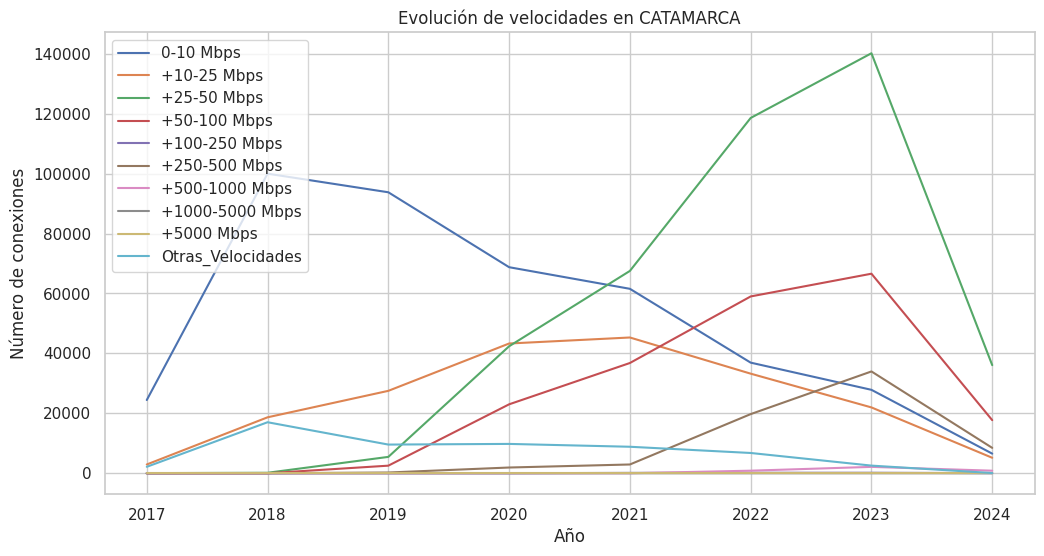

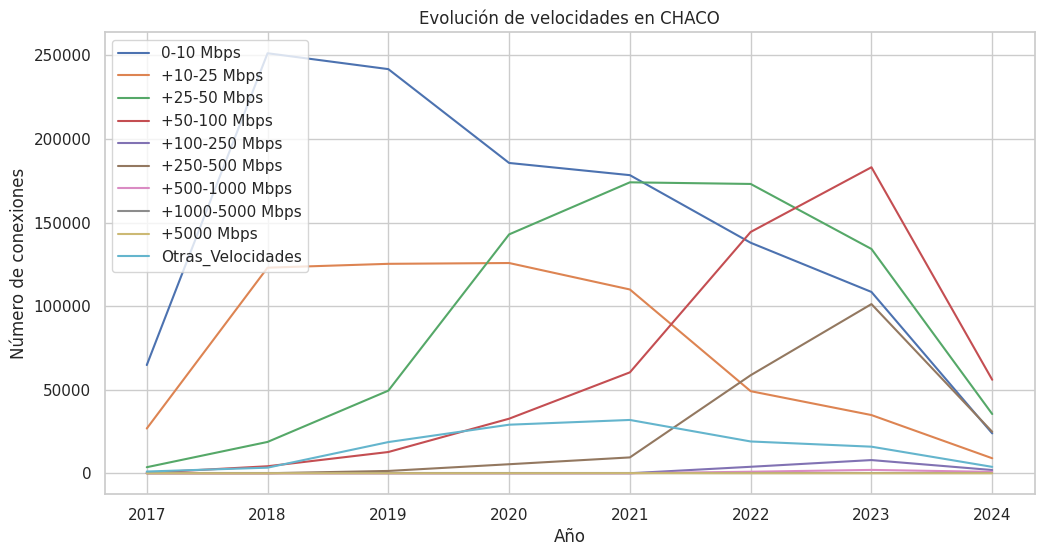

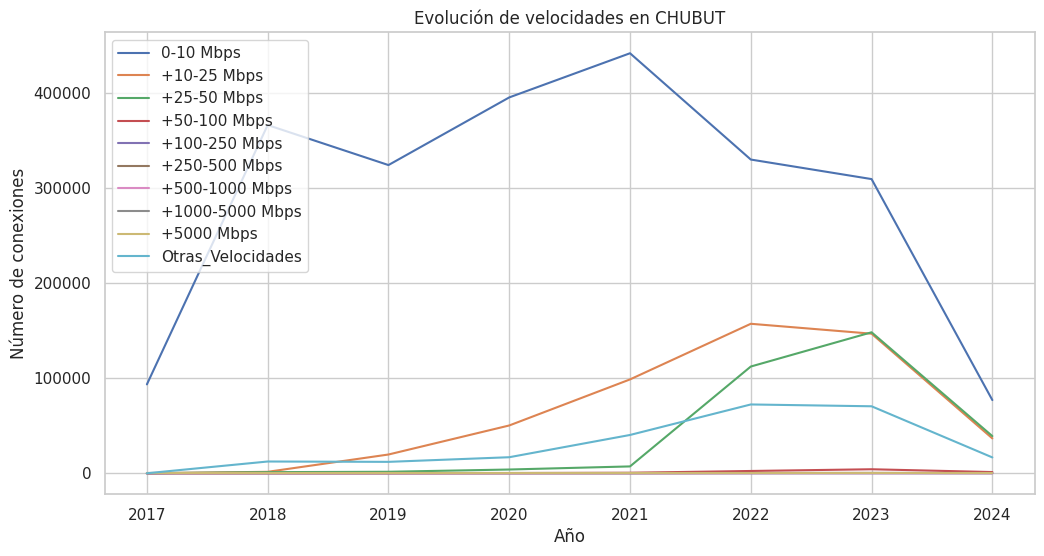

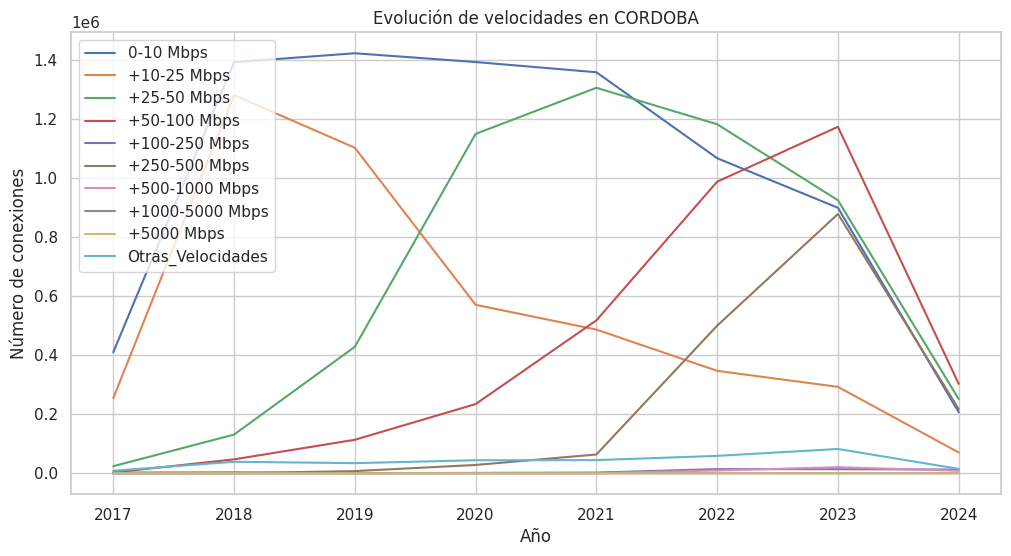

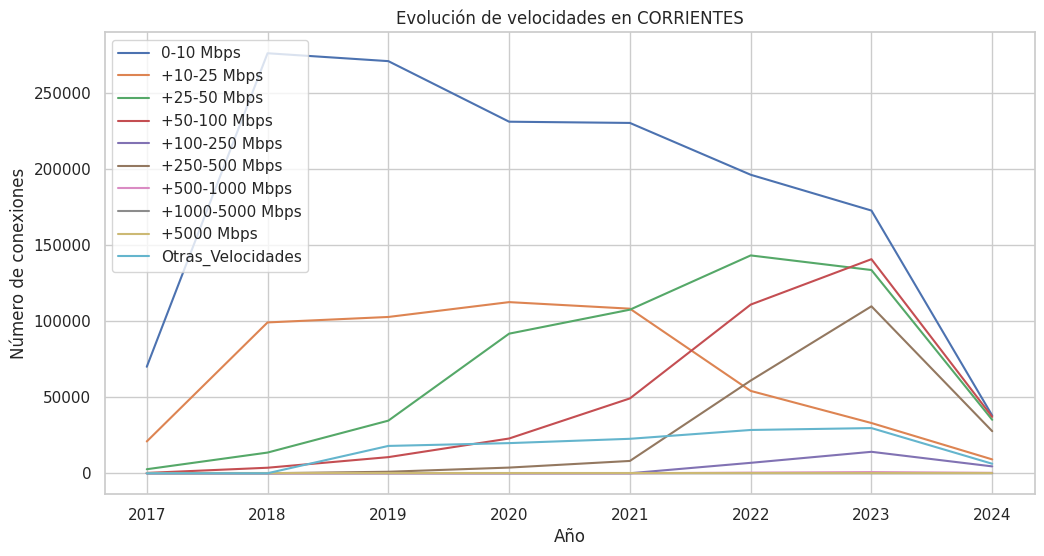

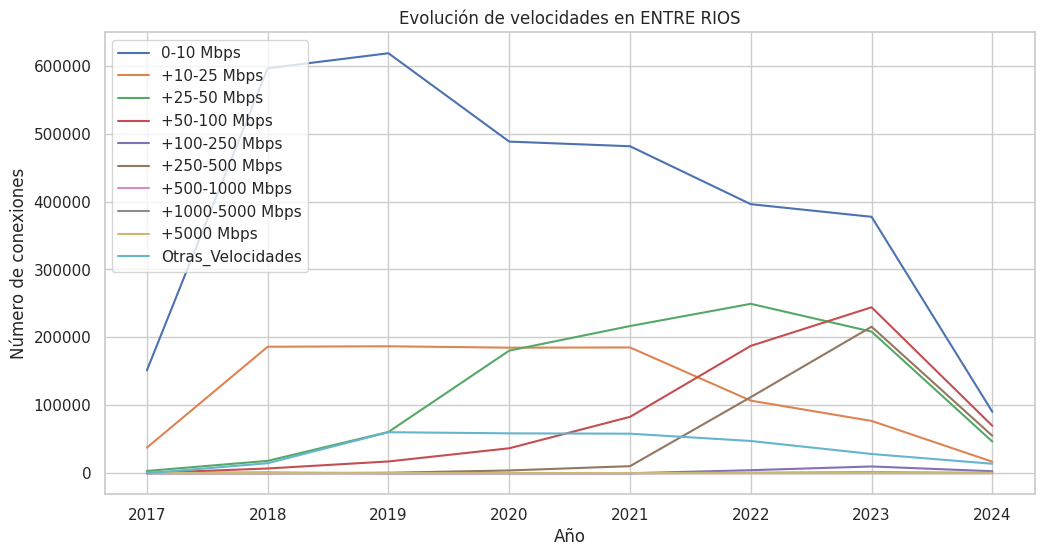

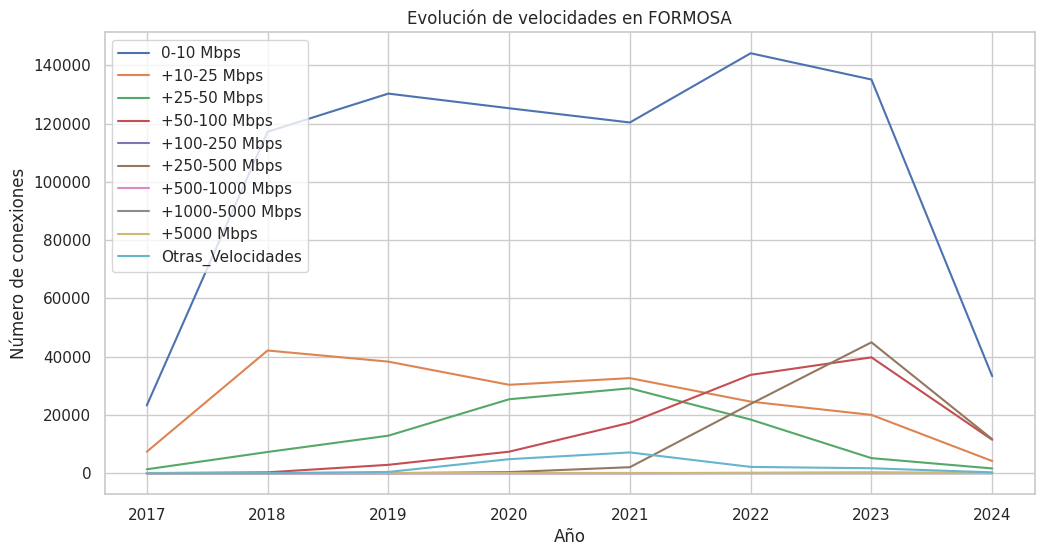

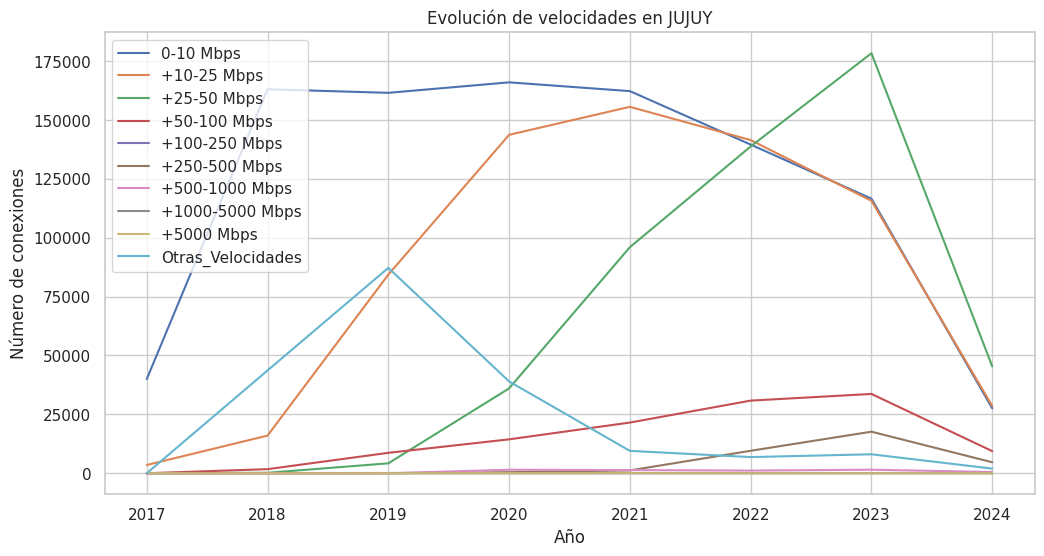

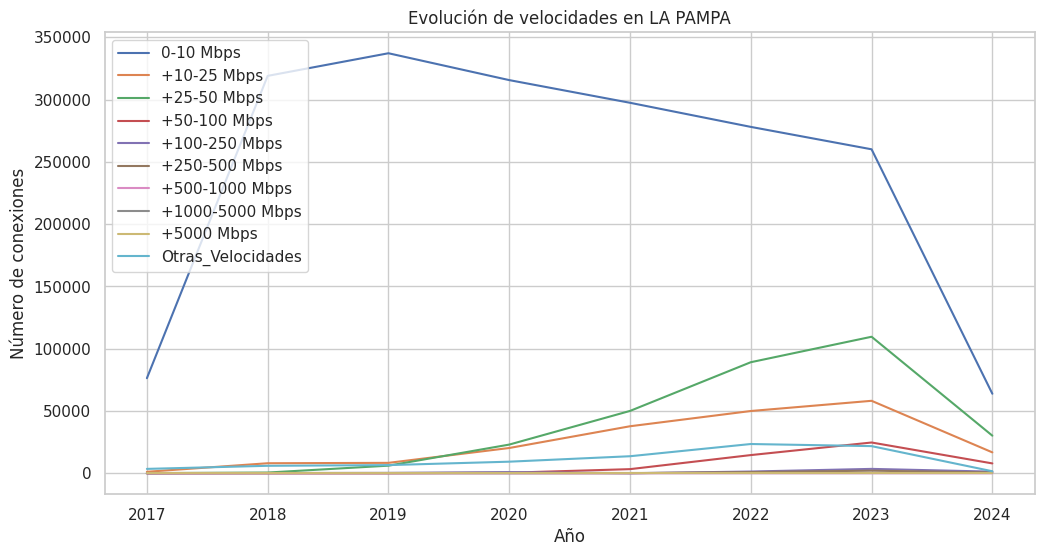

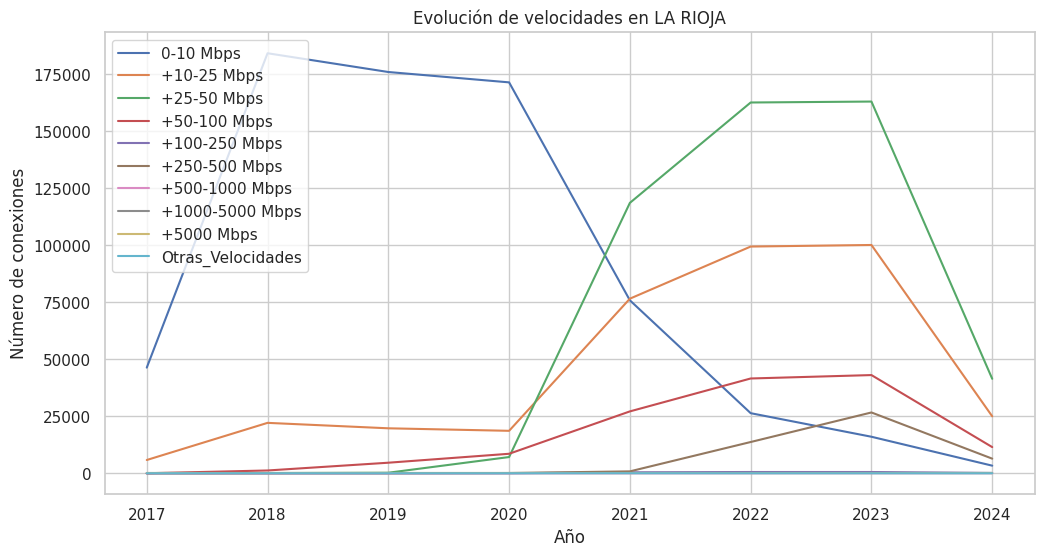

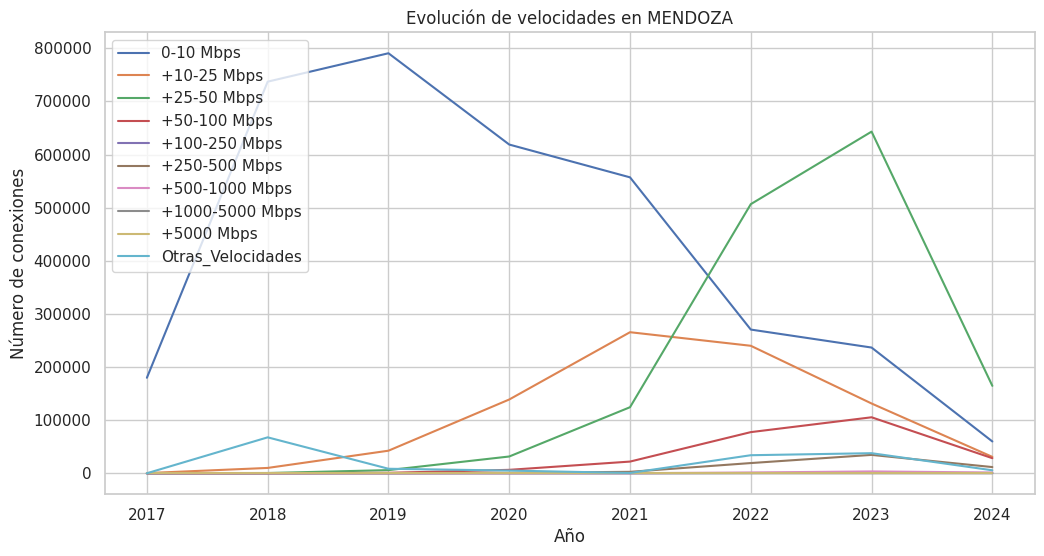

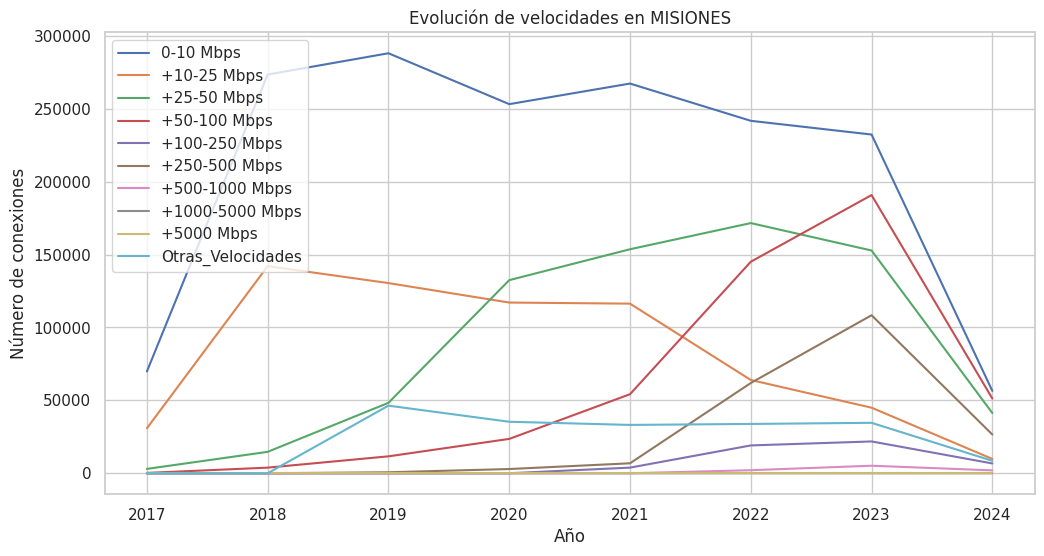

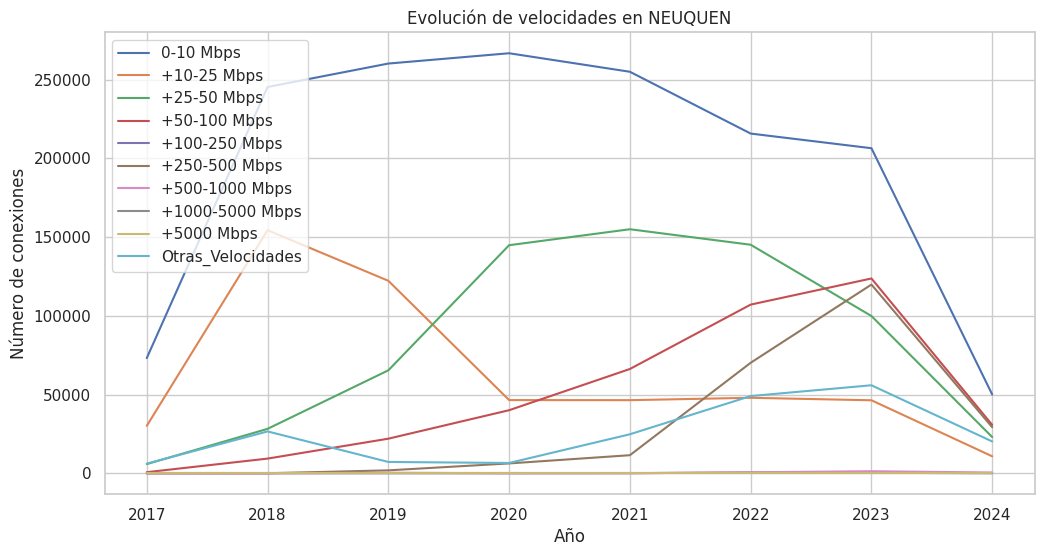

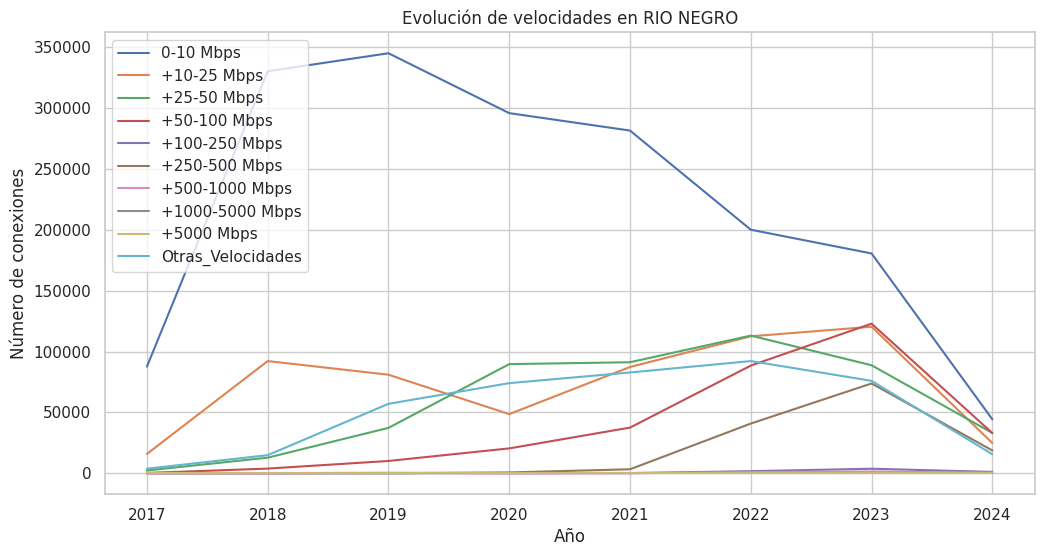

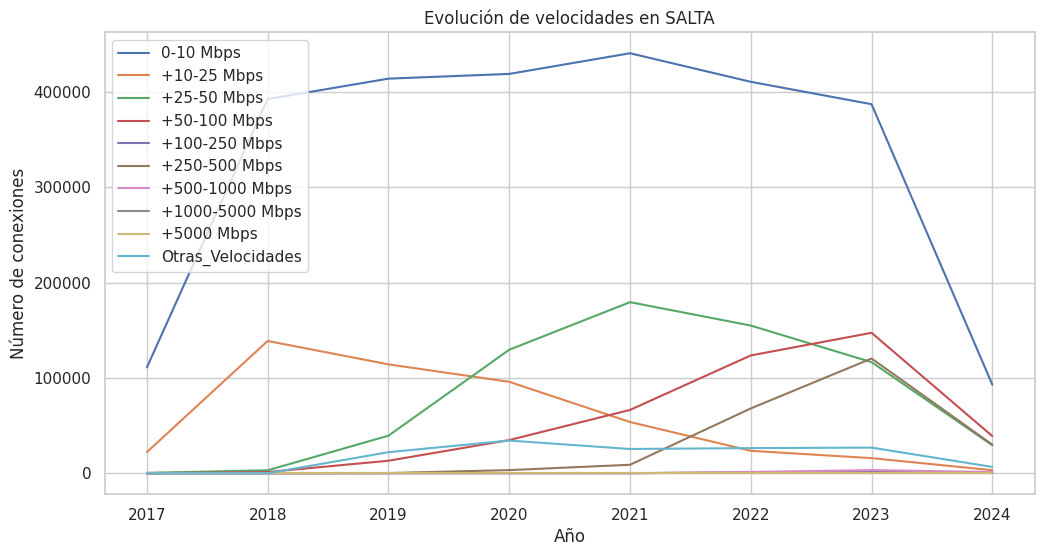

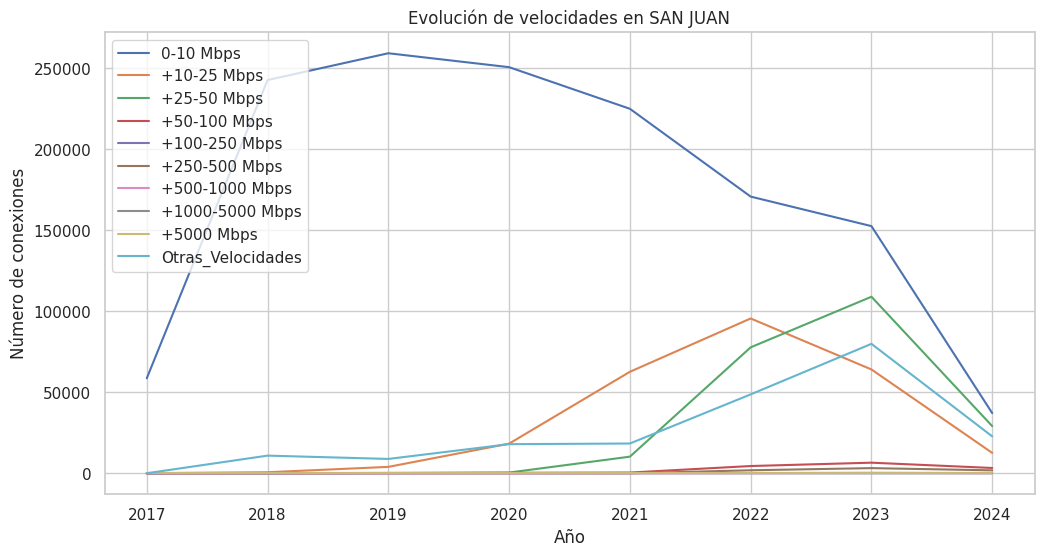

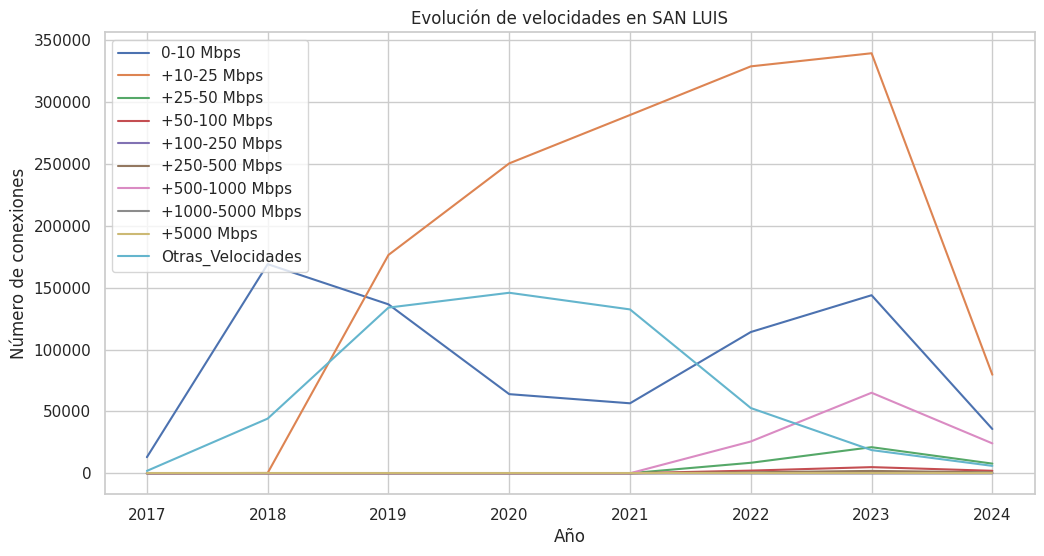

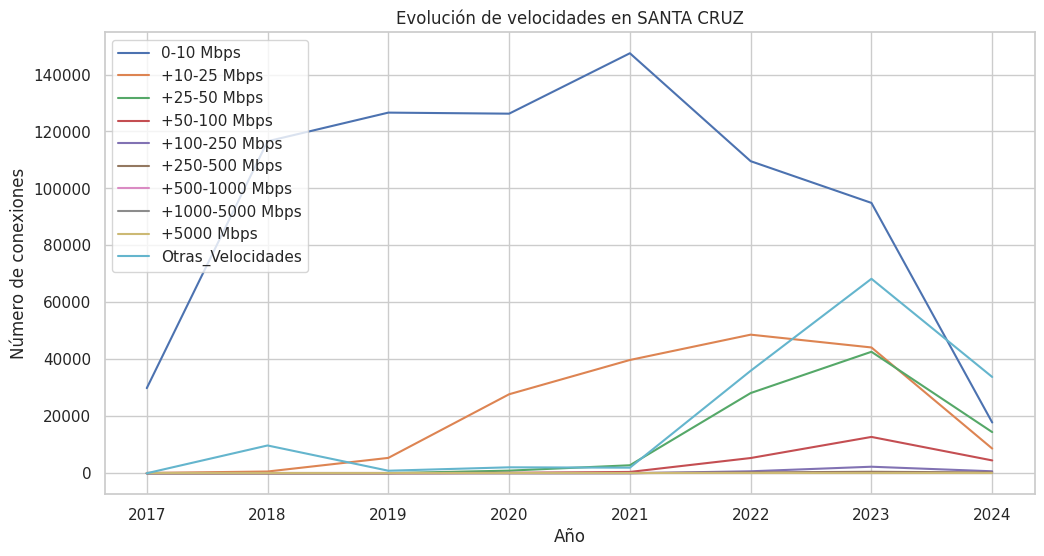

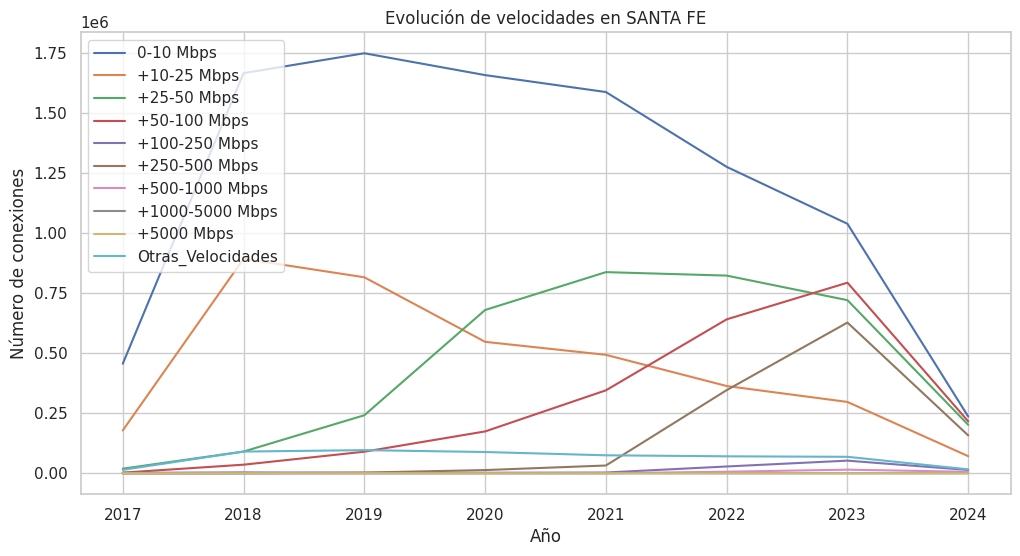

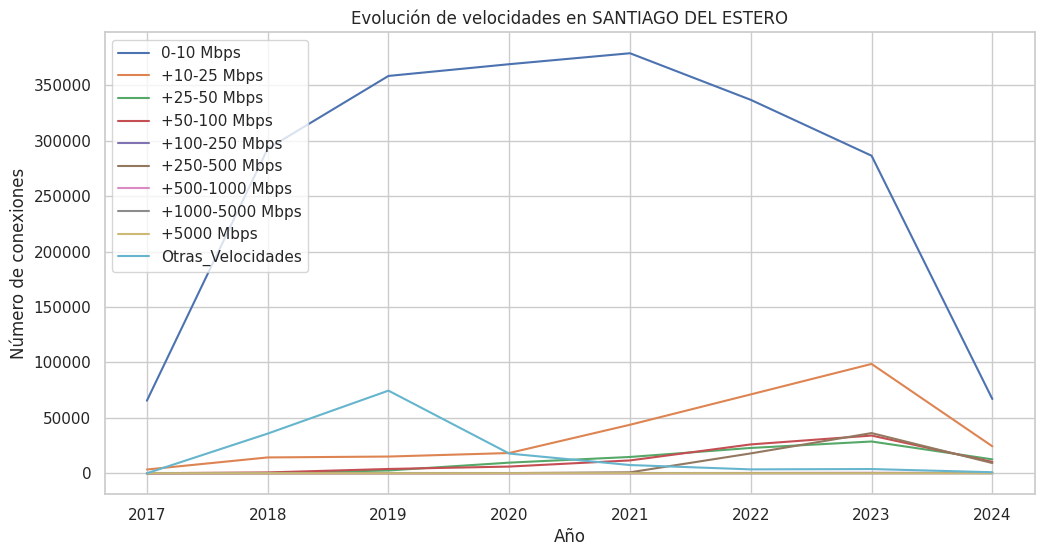

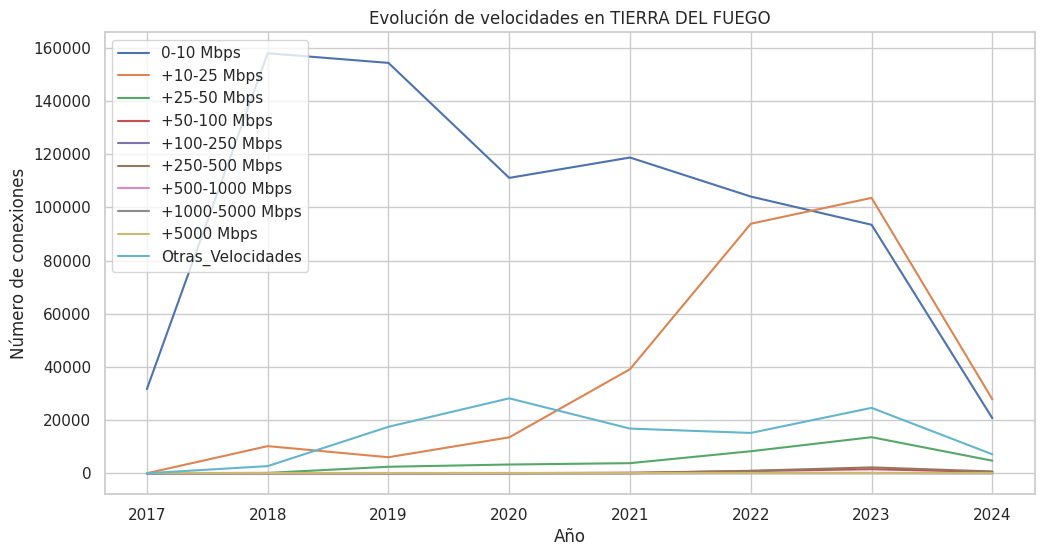

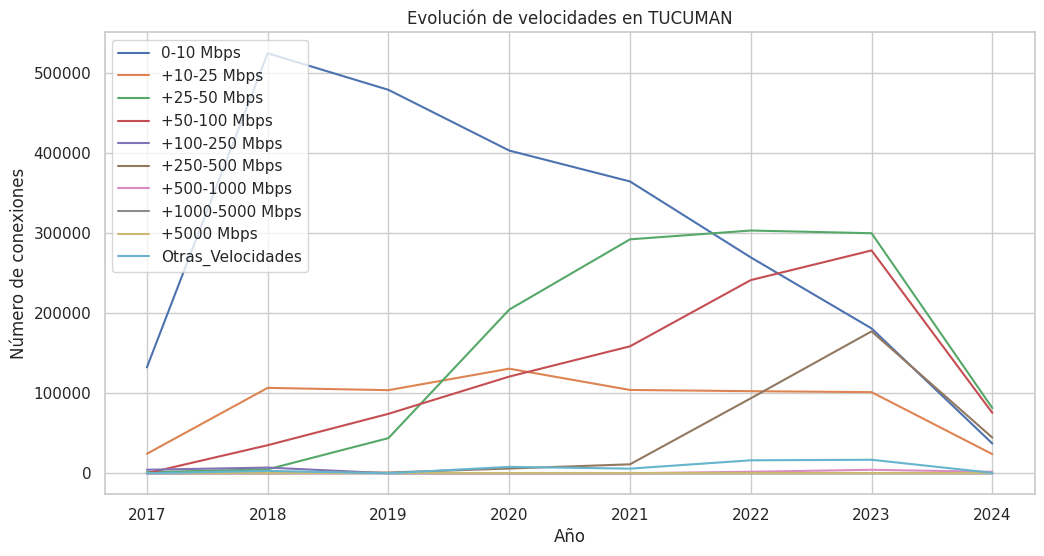

In [63]:
# Calcular los porcentajes para cada rango de velocidad
for col in velocidad_cols:
    df_grouped[col+'_pct'] = df_grouped[col] / df_grouped[velocidad_cols].sum(axis=1)

# Crear el gráfico de líneas para cada provincia
for provincia in df_grouped['Provincia'].unique():
    data = df_grouped[df_grouped['Provincia'] == provincia]
    plt.figure(figsize=(12, 6))

    # Graficar cada rango de velocidad como una línea separada
    for col in velocidad_cols:
        plt.plot(data['Año'], data[col], label=col)

    plt.title(f'Evolución de velocidades en {provincia}')
    plt.legend(loc='upper left')
    plt.xlabel('Año')
    plt.ylabel('Número de conexiones')
    plt.show()

> En general, la tendencia más notable es la disminución en el número de conexiones en los rangos de velocidad más bajos (0-10 Mbps, 10-25 Mbps) y un aumento significativo en los rangos de velocidad más altos (100-250 Mbps, 250-500 Mbps, y superiores). Esto sugiere una clara migración de los usuarios hacia conexiones de mayor velocidad. Tambien podria deberse a Ela obsolescencia de las tecnologías utilizadas para estas velocidades. Algunos rangos experimentan un crecimiento más acelerado que otros, lo que podría estar relacionado con factores como la disponibilidad de infraestructura, las ofertas comerciales de los proveedores y las características socioeconómicas de la población.

### Evolucion en el tiempo de la cantidad de accesos segun velocidad

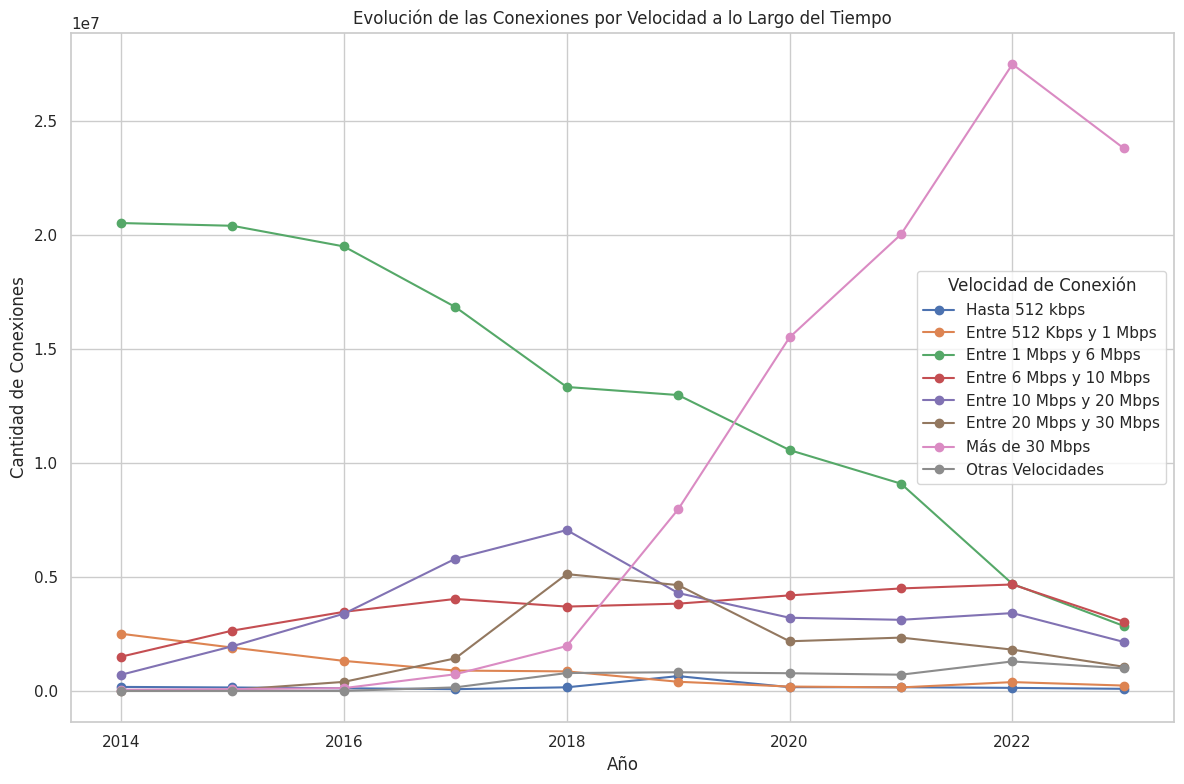

In [64]:
# Agrupar por año y sumar las cantidades
df_agrupado = df_filtradoB.groupby('Año').sum().reset_index()

# Configurar el estilo de seaborn para gráficos más atractivos
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))

# Iterar sobre cada columna de velocidad (excepto 'Año')
for column in df_agrupado.columns[12:20]:
    plt.plot(df_agrupado['Año'], df_agrupado[column], marker='o', label=column)

# Añadir título y etiquetas
plt.title('Evolución de las Conexiones por Velocidad a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Cantidad de Conexiones')
plt.legend(title='Velocidad de Conexión')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

> Es evidente una tendencia clara hacia la migración de los usuarios hacia conexiones de mayor velocidad. Las líneas correspondientes a los rangos de velocidad más altos (más de 30 Mbps) muestran un crecimiento exponencial, especialmente a partir de 2019. Por el contrario, las líneas correspondientes a los rangos de velocidad más bajos (hasta 6 Mbps) muestran una disminución constante a lo largo del tiempo. Esto indica que los usuarios están abandonando estas conexiones en favor de opciones más rápidas.

### Evolucion en el tiempo de las conexiones segun tecnologia

Evolución en el tiempo de la cantidad de conexiones a internet por diferentes tecnologías (ADSL, Cablemódem, Fibra Óptica, Wireless y Otros) desde principios de 2014 hasta principios de 2024.

In [78]:
conexiones_por_periodo = df_totales.groupby('Año-Trimestre').agg({
    'ADSL': 'sum',
    'Cablemodem': 'sum',
    'Fibra óptica': 'sum',
    'Wireless': 'sum',
    'Otros': 'sum'
}).reset_index()

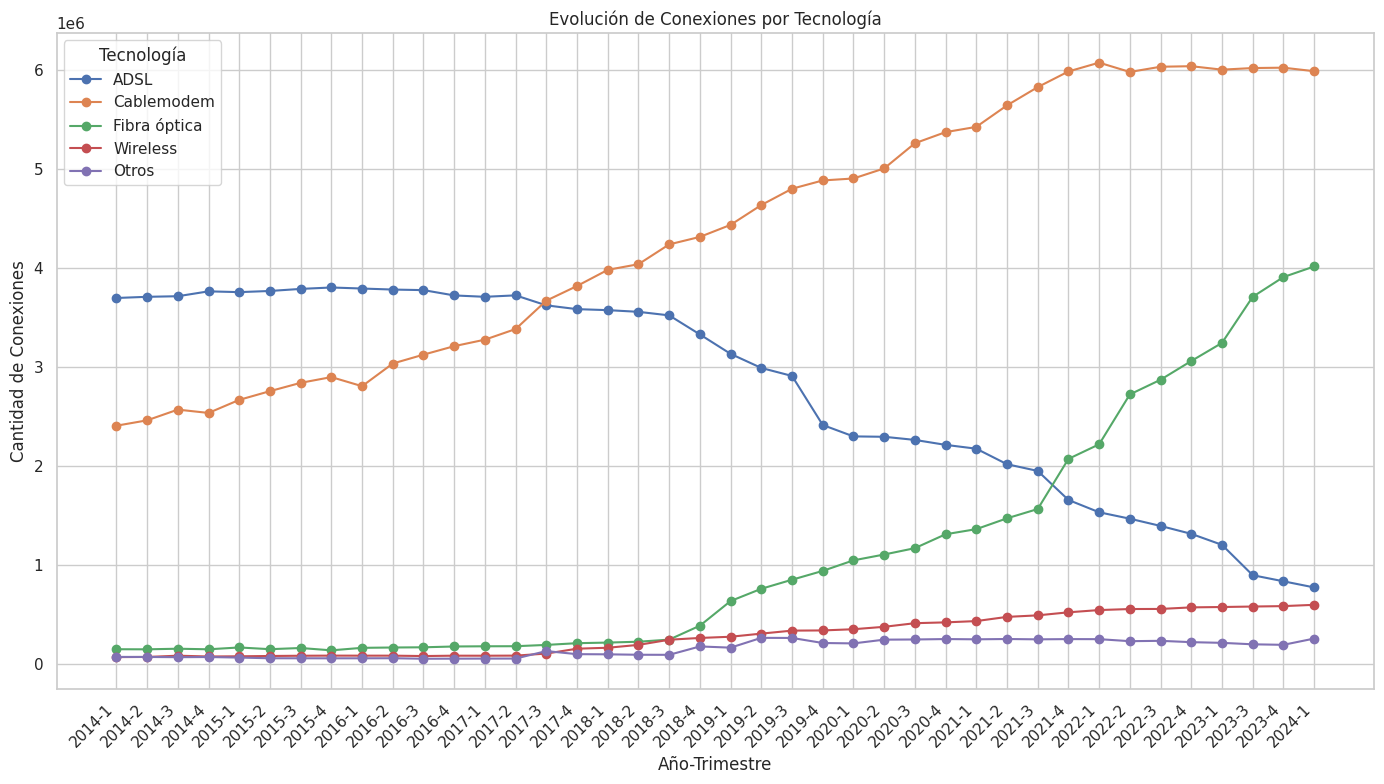

In [79]:
# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar la evolución para cada tecnología
for tecnologia in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
    plt.plot(conexiones_por_periodo['Año-Trimestre'], conexiones_por_periodo[tecnologia], marker='o', linestyle='-', label=tecnologia)

# Añadir título y etiquetas
plt.title('Evolución de Conexiones por Tecnología')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de Conexiones')
plt.xticks(rotation=45, ha='right')  # Rote las etiquetas para mejorar la visibilidad
plt.legend(title='Tecnología')
plt.grid(True)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

> A lo largo del período analizado, se observa un crecimiento sostenido y exponencial de las conexiones por fibra óptica, superando a las demás tecnologías. Aunque el cablemodem sigue siendo el mas utilizado, desde el año 2022 no ha crecido sino que mantiene una cierta estabilidad.
Las conexiones ADSL muestran una tendencia a la baja, especialmente a partir de mediados de la década. Esto sugiere una migración de los usuarios hacia tecnologías más rápidas y estables como la fibra óptica.
Las conexiones inalámbricas presentan un crecimiento más moderado en comparación con la fibra óptica, pero mantienen una tendencia al alza.
La categoría "Otros" muestra un crecimiento relativamente estable, lo que sugiere que existen otras tecnologías que mantienen una participación de mercado constante.

La clara tendencia al alza de la fibra óptica y el declive de tecnologías como ADSL indican una demanda creciente por velocidades de conexión más altas y una mejor calidad de servicio.
La fibra óptica se ha posicionado como la tecnología líder en el mercado de acceso a internet, gracias a su capacidad para ofrecer velocidades de conexión muy superiores a las demás tecnologías.
Si bien la fibra óptica domina el mercado, el crecimiento sostenido de las conexiones inalámbricas sugiere que esta tecnología seguirá siendo relevante, especialmente en áreas donde la cobertura de fibra óptica es limitada.

### Evolucion trimestral de los ingresos del sector (en miles de pesos)

In [72]:
# Crear una columna combinada para Año y Trimestre
df_totales['Año-Trimestre'] = df_totales['Año'].astype(str) + '-' + df_totales['Trimestre'].astype(str)

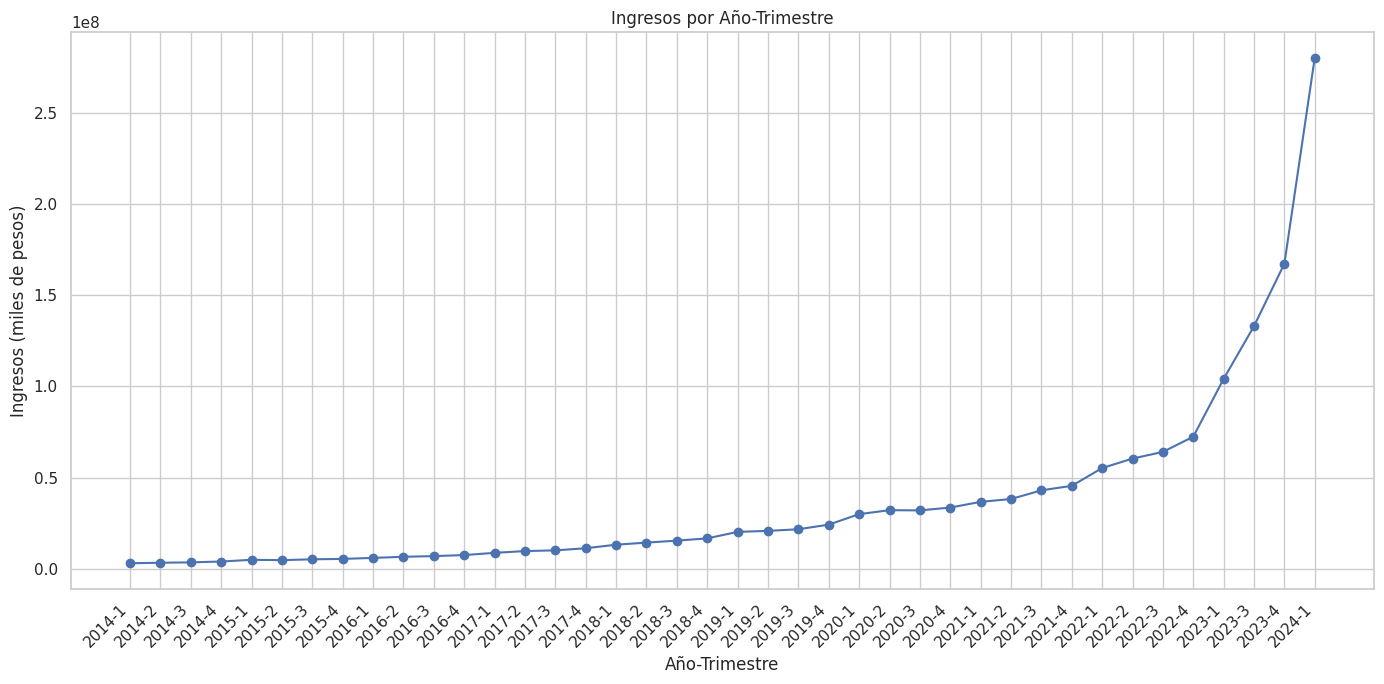

In [73]:
# Ordenar el DataFrame por Año-Trimestre para asegurar que las líneas se dibujen en el orden correcto
df_totales = df_totales.sort_values('Año-Trimestre')

# Crear el gráfico
plt.figure(figsize=(14, 7))

# Graficar los ingresos
plt.plot(df_totales['Año-Trimestre'], df_totales['Ingresos (miles de pesos)'], marker='o', linestyle='-', color='b')

# Añadir título y etiquetas
plt.title('Ingresos por Año-Trimestre')
plt.xlabel('Año-Trimestre')
plt.ylabel('Ingresos (miles de pesos)')

# Ajustar etiquetas del eje x para evitar superposición
plt.xticks(rotation=45, ha='right')  # Rote las etiquetas y alinéelas a la derecha

plt.grid(True)
plt.tight_layout()
plt.show()

> La línea muestra una clara tendencia al alza, lo que indica un crecimiento constante de los ingresos a lo largo del tiempo analizado, con un crecimiento más acelerado hacia finales del período analizado. Aunque este crecimiento exponencial puede estar influenciado en gran medida por la alta inflacion registrada en Argentina durante el ultimo año.

## **Correlacion**

Este tipo de visualizaciones nos permite entender cómo se relacionan diferentes variables entre sí. La correlación entre variables numericas puede ser positiva, es decir cuando una aumenta su valor la variable correlacionada aumenta su valor también en una proporción, si la correlación es negativa, cuando una variable aumenta la otra disminuye en una proporción y vice versa.

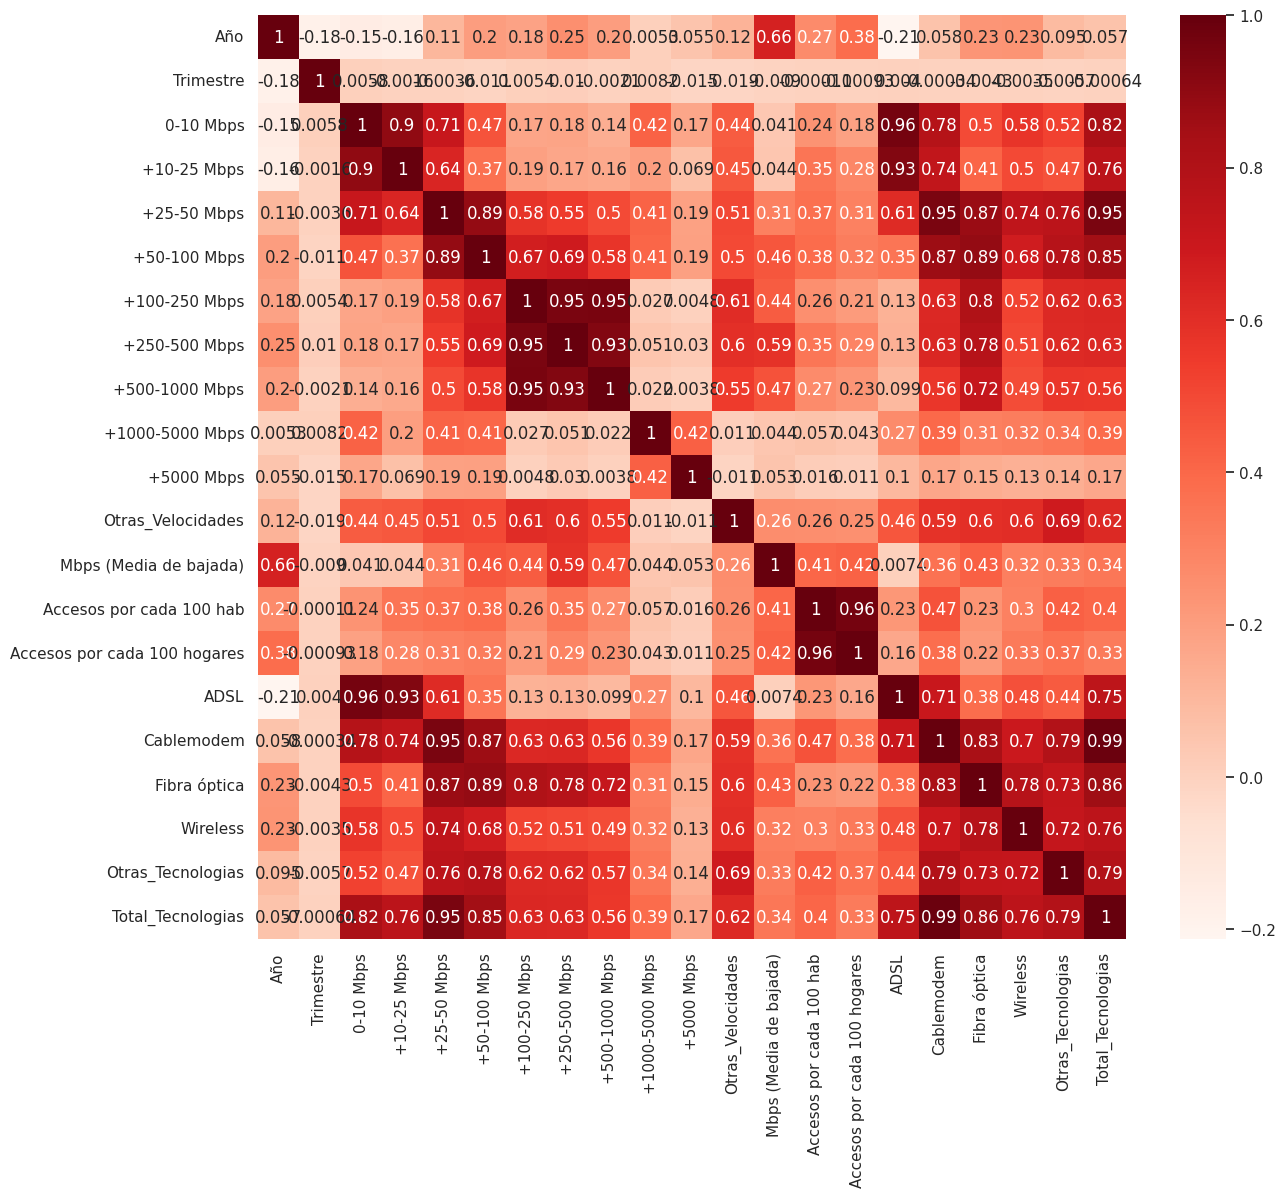

In [65]:
plt.figure(figsize=(14,12))

# Seleccionamos solo las columnas numéricas para el cálculo de la correlación
cor = df.select_dtypes(include=['number']).corr()

sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

> Existe una clara relación entre la velocidad de conexión a internet y la tecnologia utilizada.

## Cantidad de conexiones por provincia

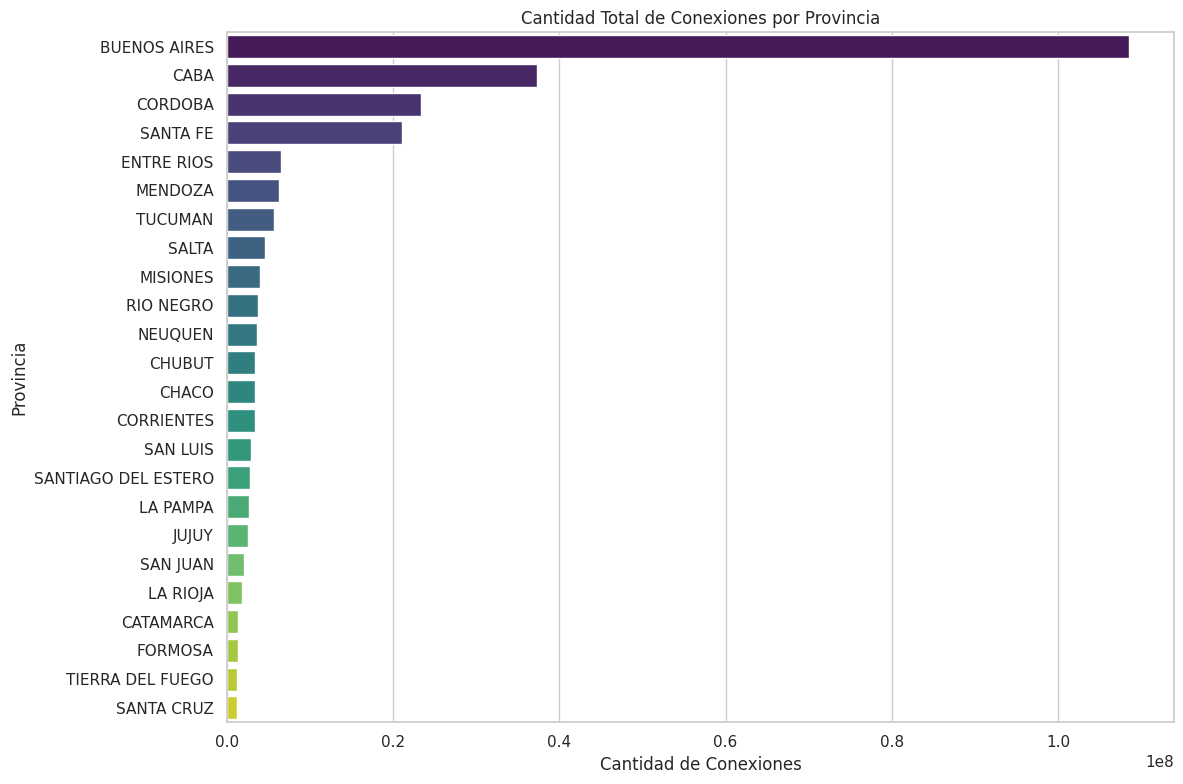

In [80]:
# Agrupar por provincia y sumar las conexiones
df_provincia_total = df.groupby('Provincia')['Total_Tecnologias'].sum().reset_index()

# Ordenar el DataFrame por la cantidad total de conexiones en orden descendente
df_provincia_total = df_provincia_total.sort_values(by='Total_Tecnologias', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras
sns.barplot(x='Total_Tecnologias', y='Provincia', data=df_provincia_total, hue='Provincia', palette='viridis', legend=False)

# Añadir título y etiquetas
plt.title('Cantidad Total de Conexiones por Provincia')
plt.xlabel('Cantidad de Conexiones')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

> Si bien este grafico nos muestra una desigualdad muy importante entre las conexiones de Buenos Aires y el resto de las provincias, es muy importante tener en cuenta que es la provincia con mas habitantes del pais; por lo que vamos a evaluar esta cantidad de conexiones en relacion a la poblacion de cada provincia.

In [67]:
# DataFrame de población (ejemplo)
df_poblacion = pd.DataFrame({
    'Provincia': ['BUENOS AIRES','CABA','CORDOBA','SANTA FE','ENTRE RIOS','CORRIENTES','MENDOZA','TUCUMAN','SALTA','MISIONES','RIO NEGRO','NEUQUEN','CHUBUT','CHACO','SAN LUIS','SANTIAGO DEL ESTERO','LA PAMPA','JUJUY','SAN JUAN','LA RIOJA','CATAMARCA','FORMOSA','TIERRA DEL FUEGO','SANTA CRUZ'],
    'Poblacion': [17523996,3121707,3840905,3544908,1425578,1212696,2043540,1731820,1441351,1278873,750768,710814,592621,1129606,542069,1060906,361859,811611,822853,383865,429562,607419,185732,337226]
})

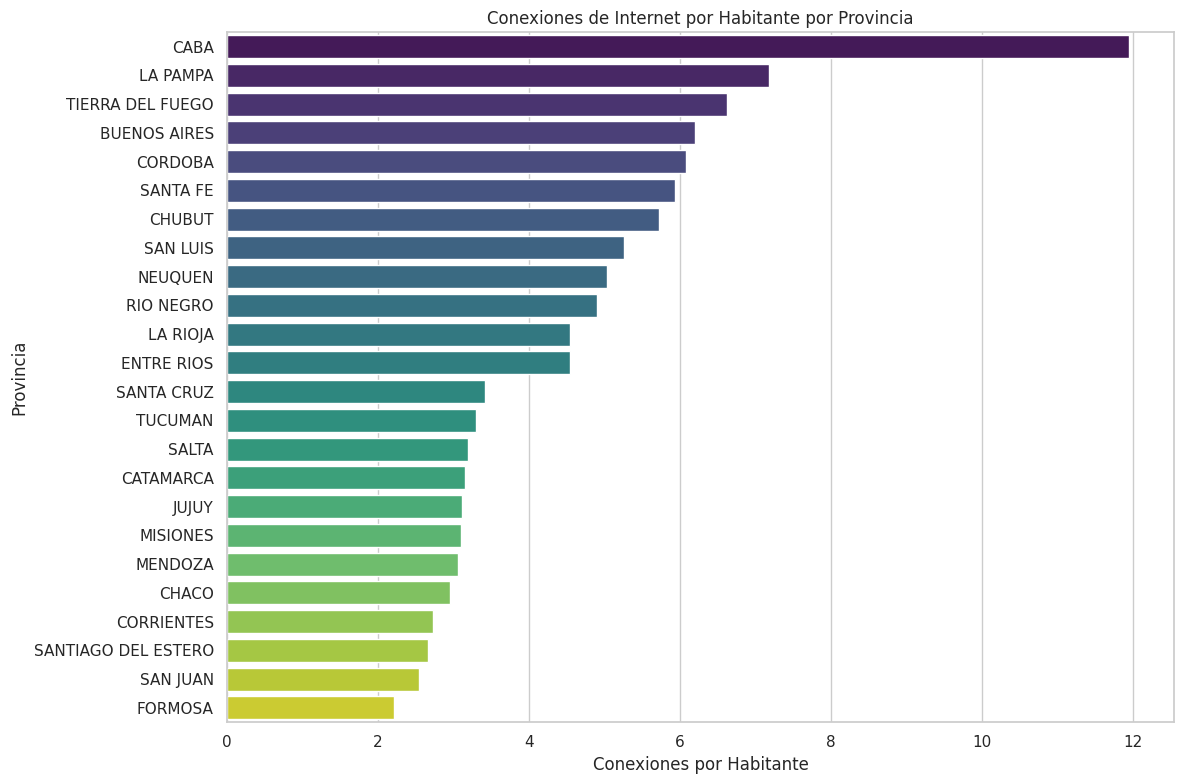

In [68]:
# Unir los DataFrames de conexiones y población por la columna 'provincia'
df_completo = pd.merge(df_provincia_total, df_poblacion, on='Provincia')

# Calcular conexiones per cápita: Dividir la cantidad total de conexiones por la población de cada provincia
# para obtener el número de conexiones por habitante.
df_completo['conexiones_per_capita'] = df_completo['Total_Tecnologias'] / df_completo['Poblacion']

# Ordenar el DataFrame por conexiones per cápita
df_completo = df_completo.sort_values(by='conexiones_per_capita', ascending=False)

# Configurar el estilo de seaborn para gráficos más atractivos
#sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras de conexiones per cápita
sns.barplot(x='conexiones_per_capita', y='Provincia', hue='Provincia', data=df_completo, palette='viridis')

# Añadir título y etiquetas
plt.title('Conexiones de Internet por Habitante por Provincia')
plt.xlabel('Conexiones por Habitante')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

> El gráfico revela una marcada desigualdad en el acceso a internet entre las diferentes provincias argentinas. La Ciudad Autónoma de Buenos Aires (CABA) lidera el ranking, con una cantidad significativamente mayor de conexiones por habitante en comparación con el resto de las provincias. Le siguen provincias como La Pampa, Tierra del Fuego y Buenos Aires, que también presentan un alto nivel de conectividad. Estas provincias podrían tener un desarrollo económico más avanzado o políticas públicas que promueven el acceso a internet.
En el extremo opuesto se encuentran provincias como Formosa, San Juan y Santiago del Estero, con un número menor de conexiones por habitante. Esto sugiere que en estas regiones existe una brecha digital más pronunciada y que el acceso a internet podría ser más limitado.
Se observa una cierta tendencia regional en la distribución de las conexiones. Por ejemplo, las provincias del centro y del sur del país tienden a tener un mayor nivel de conectividad en comparación con las provincias del norte.

## Visualizar la Penetración de Internet en Argentina

In [69]:
df_totales_agrupado = df_totales.groupby(['Año']).agg({
    'Accesos por cada 100 hab': 'mean',
    'Accesos por cada 100 hogares': 'mean'
}).reset_index()

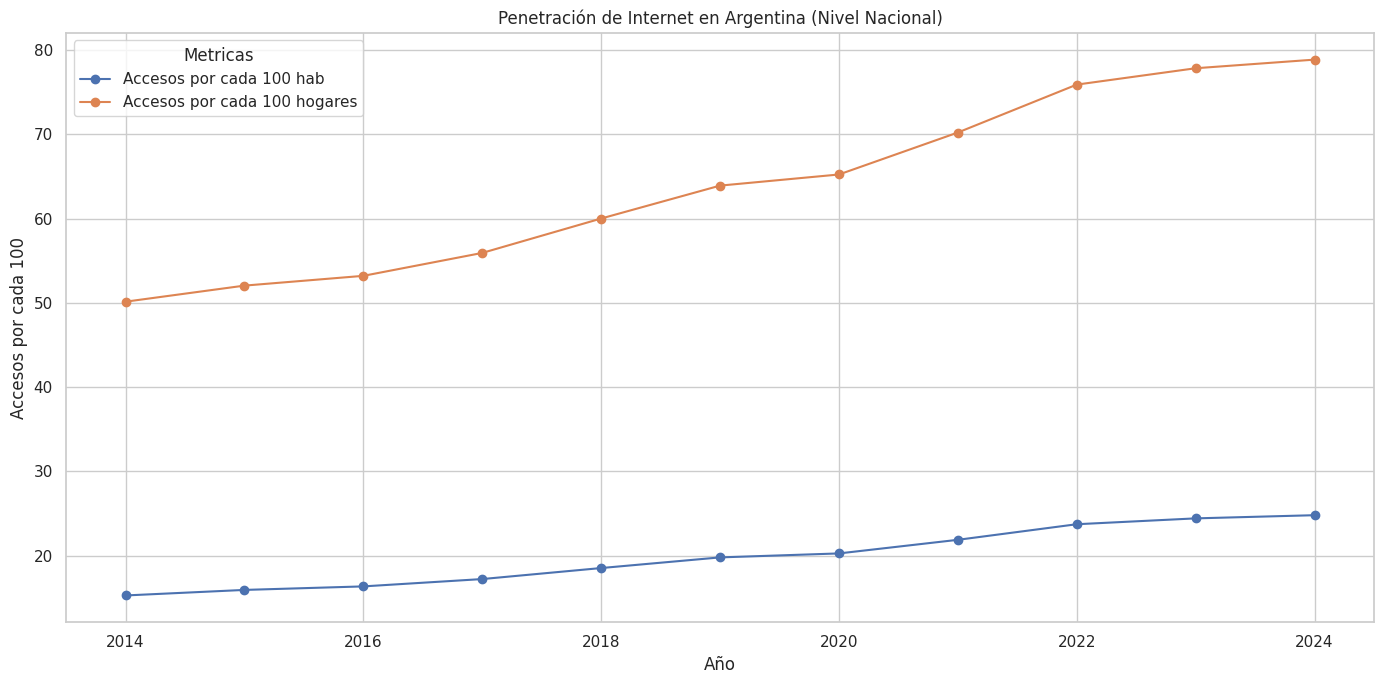

In [70]:
# Crear el gráfico de líneas
plt.figure(figsize=(14, 7))

# Graficar accesos por cada 100 habitantes
plt.plot(df_totales_agrupado['Año'], df_totales_agrupado['Accesos por cada 100 hab'], marker='o', label='Accesos por cada 100 hab')

# Graficar accesos por cada 100 hogares
plt.plot(df_totales_agrupado['Año'], df_totales_agrupado['Accesos por cada 100 hogares'], marker='o', label='Accesos por cada 100 hogares')

# Añadir título y etiquetas
plt.title('Penetración de Internet en Argentina (Nivel Nacional)')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100')
plt.legend(title='Metricas')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

> Ambas métricas muestran una clara tendencia al alza a lo largo del período analizado, lo que indica un crecimiento constante en la penetración de internet en Argentina. Aunque, la línea de "Accesos por cada 100 hogares" presenta un crecimiento más pronunciado. Esto podría indicar que, además de un aumento en el número total de conexiones, se está produciendo una mayor concentración de conexiones dentro de cada hogar, es decir, hay más de una conexión a internet por hogar; por ejemplo, con la presencia de múltiples dispositivos conectados (computadoras, smartphones, tablets, etc.).

## Visualizar la Penetración de Internet en cada provincia de Argentina

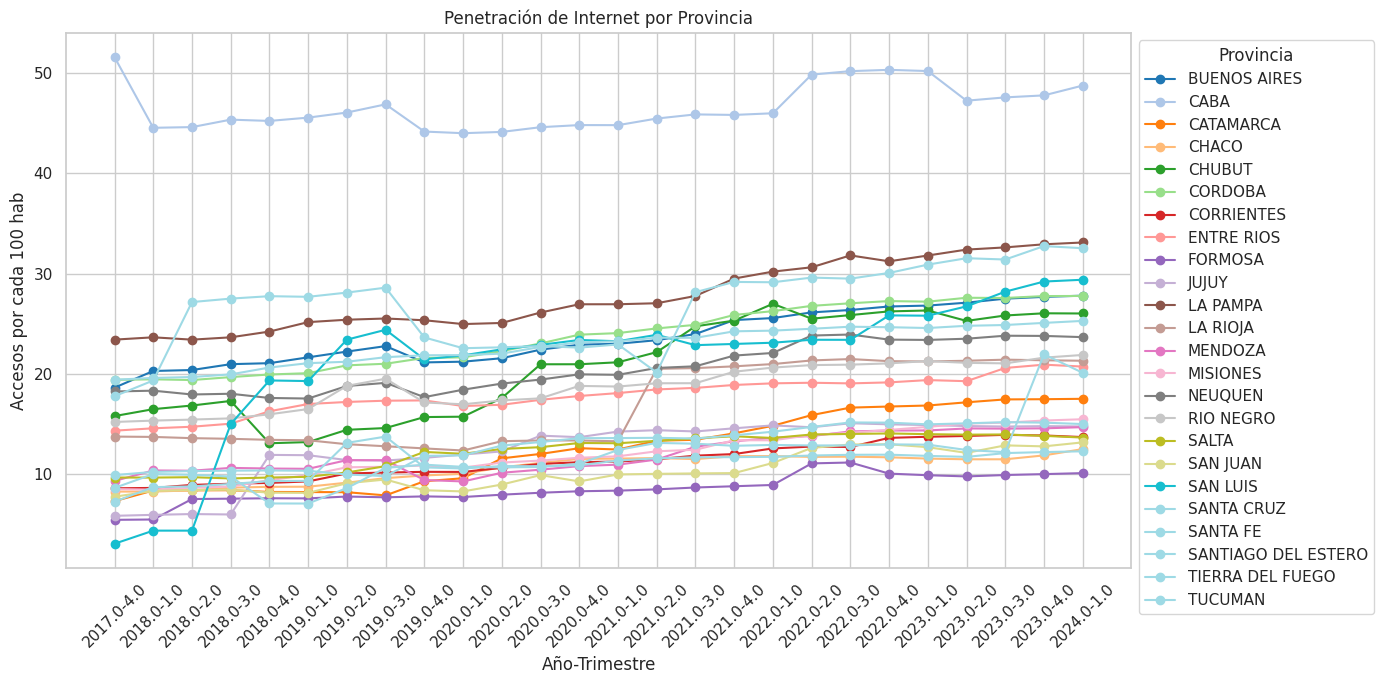

In [71]:
# Agrupar por Año, Trimestre y Provincia y calcular la media
df_agrupadoPI = df.groupby(['Año', 'Trimestre', 'Provincia']).agg({
    'Accesos por cada 100 hab': 'mean',
    'Accesos por cada 100 hogares': 'mean'
}).reset_index()

# Crear el gráfico de líneas para cada provincia
plt.figure(figsize=(14, 7))

# Importar la librería necesaria para paletas de colores
#import matplotlib.cm as cm

# Crear un mapa de colores
colormap = plt.colormaps['tab20']

# Graficar accesos por cada 100 habitantes para cada provincia
for i, provincia in enumerate(df_agrupadoPI['Provincia'].unique()):
    df_provincia = df_agrupadoPI[df_agrupadoPI['Provincia'] == provincia]
    # Convertir 'Año' y 'Trimestre' a tipo cadena antes de la concatenación
    plt.plot(df_provincia['Año'].astype(str) + '-' + df_provincia['Trimestre'].astype(str),
             df_provincia['Accesos por cada 100 hab'], marker='o', label=provincia, color=colormap(i))

plt.title('Penetración de Internet por Provincia')
plt.xlabel('Año-Trimestre')
plt.ylabel('Accesos por cada 100 hab')
plt.legend(title='Provincia', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

> La mayoría de las provincias muestran una tendencia al alza en la penetración de internet, lo que indica un crecimiento sostenido en el acceso a internet en todo el país. Aunque existen claras diferencias entre las provincias. Algunas, como CABA y Buenos Aires, muestran una penetración mucho mayor y un crecimiento más rápido que otras. Esto sugiere una brecha digital significativa entre las distintas regiones del país. Las líneas de cada provincia presentan diferentes pendientes, lo que indica que el ritmo de crecimiento varía considerablemente entre ellas. Algunas provincias han experimentado un crecimiento más acelerado que otras.

Las provincias con mayor desarrollo económico suelen tener una mayor penetración de internet debido a una mayor capacidad adquisitiva y una mayor demanda de servicios digitales. Por otra parte, las zonas urbanas suelen tener una mayor concentración de servicios de internet en comparación con las zonas rurales. El relieve, el clima y la distancia a los centros urbanos pueden dificultar la implementación de redes de telecomunicaciones en algunas regiones por lo que La disponibilidad de infraestructura de telecomunicaciones, como redes de fibra óptica, es fundamental para garantizar un acceso de calidad a internet.

## Analisis de las tecnologias utilizadas para la conexion a Internet

### Porcentaje de cada tecnologia utilizada en el pais

Distribución porcentual de diferentes tecnologías utilizadas para acceder a internet en Argentina

In [74]:
# Sumar los accesos por cada tecnología
totales_tecnologias = df_localidades[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA',
                                      'SATELITAL', 'WIMAX', 'WIRELESS', 'Otras_Tecnologias']].sum()

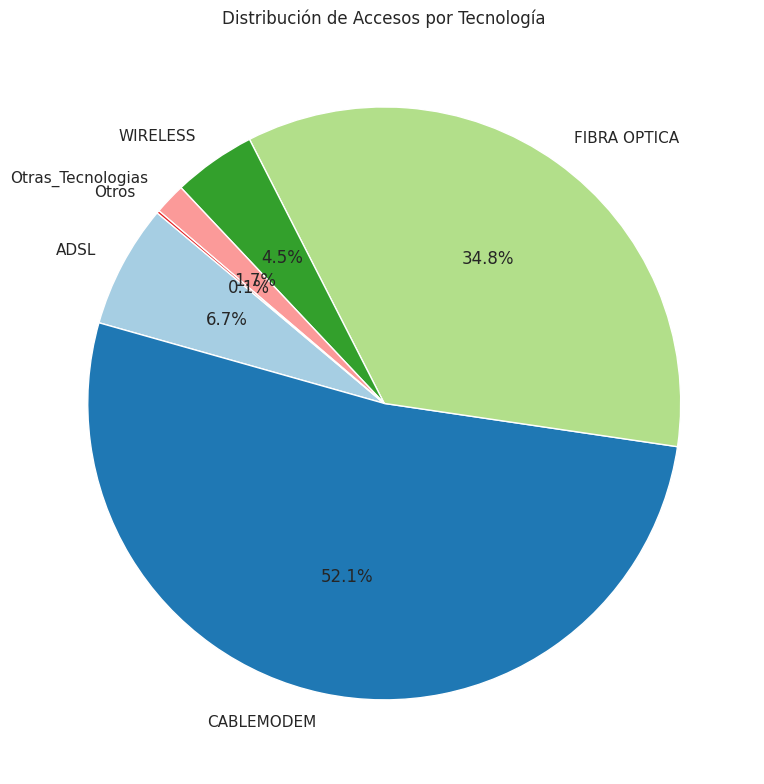

In [75]:
# Definir un umbral para agrupar tecnologías con porcentajes muy bajos
umbral = 0.01  # Porcentaje mínimo para considerar cada tecnología

# Calcular el porcentaje de cada tecnología
porcentajes = totales_tecnologias / totales_tecnologias.sum()

# Agrupar tecnologías pequeñas en una categoría "Otros"
tecnologias_principales = porcentajes[porcentajes > umbral].index
otros_total = totales_tecnologias[~totales_tecnologias.index.isin(tecnologias_principales)].sum()

# Crear una nueva serie con la categoría "Otros"
otros_serie = pd.Series({'Otros': otros_total})

# Concatenar las series en lugar de usar append
totales_agrupados = pd.concat([totales_tecnologias[tecnologias_principales], otros_serie])
porcentajes_agrupados = totales_agrupados / totales_agrupados.sum()

# Crear el gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(porcentajes_agrupados, labels=porcentajes_agrupados.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(porcentajes_agrupados))), startangle=140)
plt.title('Distribución de Accesos por Tecnología')
plt.tight_layout()
plt.show()

> El cablemodem es la tecnología predominante, representando el 52.1% de los accesos. Es posible que la infraestructura de cablemódem se haya desplegado de manera más extensa en el pais, o bien, que los proveedores de servicios de internet ofrezcan planes más atractivos en términos de precio o velocidad, incentivando a los usuarios a optar por esta tecnología, lo que explicaría su mayor participación. Luego, la fibra optica con un 34.8% de conexiones, refleja una clara tendencia hacia la búsqueda de velocidades de conexión más altas y una mejor calidad de servicio. Tecnologías como ADSL 6.7% y otras más antiguas muestran una participación minoritaria, lo que sugiere un proceso de migración hacia tecnologías más modernas. Las conexiones inalámbricas Wireless representan el 4.5% del total, lo que indica una participacion importante tambien, aunque en menor cantidad respecto al cablemodem y la fibra optica, pero se encuentra en el 4to lugar de las tecnologias utilizadas.

### Utilizacion de cada tecnologia en las diferentes provincias

Comparación visual de la cantidad de conexiones a internet por diferentes tecnologías en cada provincia de Argentina. Cada barra representa una provincia, y las secciones de cada barra corresponden a las distintas tecnologías de conexión

In [76]:
# Agrupar por Provincia y sumar las cantidades de conexiones para cada tecnología
totales_por_provincia = df_localidades.groupby('Provincia').agg({
    'ADSL': 'sum',
    'CABLEMODEM': 'sum',
    'DIAL UP': 'sum',
    'FIBRA OPTICA': 'sum',
    'SATELITAL': 'sum',
    'WIMAX': 'sum',
    'WIRELESS': 'sum',
    'Otras_Tecnologias': 'sum'
}).reset_index()

<Figure size 1400x800 with 0 Axes>

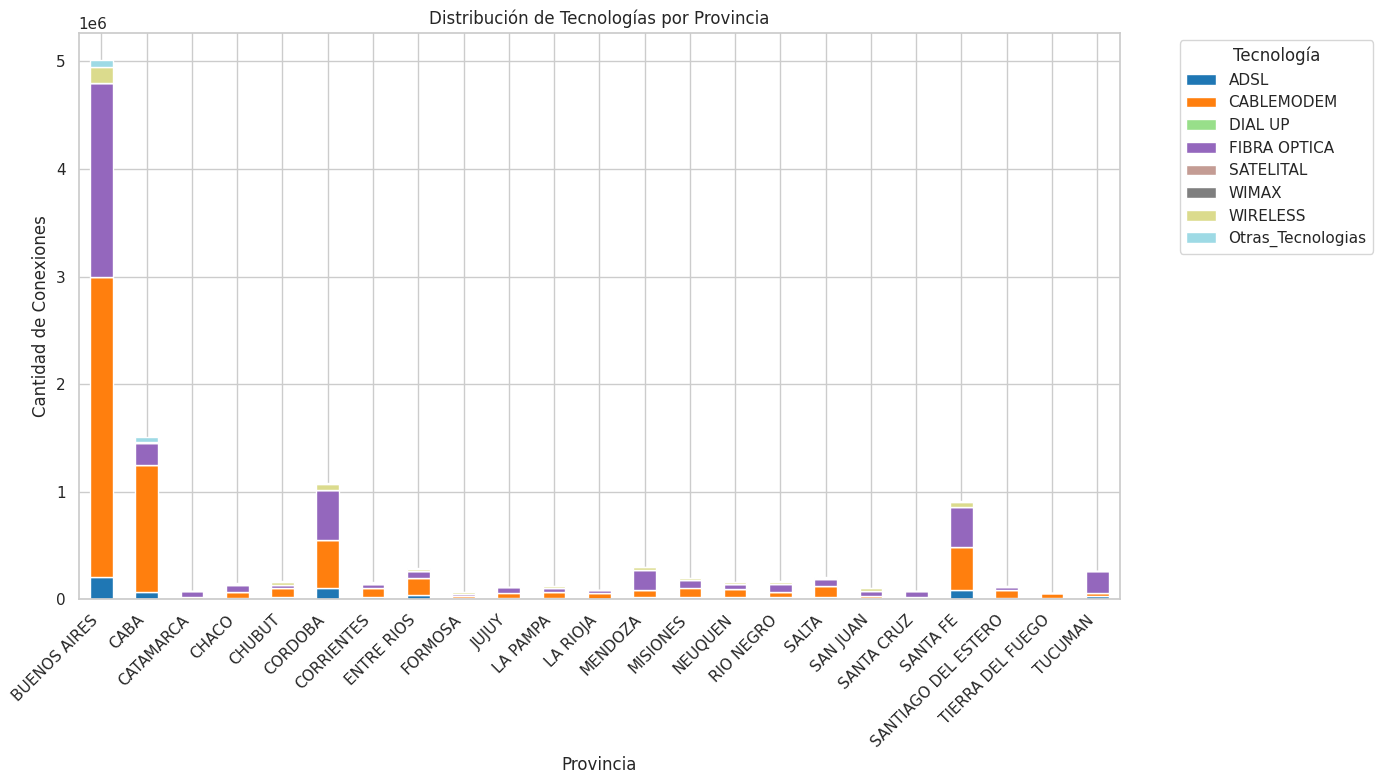

In [77]:
# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Graficar las barras apiladas
totales_por_provincia.set_index('Provincia').plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Añadir título y etiquetas
plt.title('Distribución de Tecnologías por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Conexiones')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rote las etiquetas para mejor visibilidad

plt.tight_layout()
plt.show()

> En la mayoría de las provincias, la fibra óptica y el cablemodem son las tecnologias que presentan el mayor número de conexiones.
Existe una gran disparidad en la distribución de tecnologías entre las diferentes provincias. Algunas, como Buenos Aires y CABA, concentran un número significativamente mayor de conexiones en general.
Tecnologías como Dial-up y WIMAX muestran un número muy bajo de conexiones en la mayoría de las provincias, lo que sugiere su gradual desaparición debido a la aparición de tecnologías más avanzadas.
En la mayoria de las provincias coexisten múltiples tecnologías, lo que podría indicar diferencias en la infraestructura de telecomunicaciones o en las preferencias de los usuarios.
La categoría "Otras Tecnologías" sugiere la presencia de tecnologías menos comunes o regionales, que podrían incluir conexiones satelitales o tecnologías específicas de ciertos proveedores.

La distribución de tecnologías muestra una brecha digital entre las provincias, con algunas más avanzadas en términos de infraestructura y acceso a internet de alta velocidad, como Buenos Aires, CABA y Cordoba.
Las provincias con un menor número de conexiones de fibra óptica, como Tierra del Fuego presentan un mayor potencial de crecimiento en este segmento, o bien el wireless; lo que podría impulsar el desarrollo económico y social.
Esta distribución de las tecnologías puede estar influenciada por diversos factores, como la densidad poblacional, la distancia a los centros urbanos, la disponibilidad de infraestructura y las políticas de los proveedores de servicios.